In [221]:
import pandas as pd 
import numpy as np 
from collections import Counter, defaultdict
db = pd.read_pickle('./server/concat_db2.pkl')
db['Tags'] = db['Tags'].apply(lambda x: ast.literal_eval(x) if type(x) is str else x)
db = db.dropna(subset=['Role'])
db.describe()

,Unnamed: 0
count,1576.000000
mean,787.500000
std,455.096327
min,0.000000
25%,393.750000
50%,787.500000
75%,1181.250000
max,1575.000000


In [194]:
db1 = pd.read_pickle('./server/db_large.pkl')
db2 = pd.read_csv('./server/no_fluffs.csv')
db2 = db2.drop_duplicates()
db2['Tags'] = db2['Tags'].apply(lambda x: ast.literal_eval(x))
db2['Tags'] = db2['Tags'].apply(lambda x: [y.replace(',','').strip().lower() for y in x])

db3 = pd.concat([db1, db2])
db3.head()
db = db3

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  import sys


In [195]:
db2['Tags'].iloc[0]

['c/c++', '3d graphics']

In [198]:
db3.to_pickle('./server/concat_db2.pkl')

In [227]:
db3['Role'].value_counts()

Mobile Developer                             609
Backend Developer                            496
Full Stack Developer                         480
Frontend Developer                           460
Data Scientist                               239
DevOps                                       224
System Administrator                         216
QA/Test Developer                            213
Database Administrator                       125
Product Manager                              106
Embedded Developer                            76
DevOps, System Administrator                  67
Backend Developer, Full Stack Developer       65
Designer                                      54
Java Developer                                46
DevOps Engineer                               42
Frontend Developer, Full Stack Developer      41
.NET Developer                                36
Desktop Developer                             28
Graphics/Game Developer                       22
Backend Developer, D

In [159]:
new_roles = db.loc[db['Role'].isin(['Product Manager'])]
all_tags = new_roles['Tags'].to_numpy()
# print(all_tags)
flat_tags = np.concatenate(all_tags).ravel()
print(flat_tags)
from collections import Counter, defaultdict

c = Counter(flat_tags)
print(len(new_roles))
final_statistics = defaultdict(dict)
for k, v in c.items():
    final_statistics[k] = {
        'count': v,
        'percentage': v*100/len(new_roles)
    }
    
final_statistics

['python' 'saas' 'e-commerce' 'product-management' 'product' 'python'
 'finance' 'postgresql' 'sql' 'jira' 'azure' '.net' '.net-core' 'tdd' 'c#'
 'project-management' 'php' 'wordpress' 'project-management'
 'web-services' 'security' 'project-management' 'amazon-web-services'
 'web-services' 'project-management' 'amazon-web-services' 'java' '.net'
 '.net-core' 'asp.net-core' 'wpf' 'c#' 'project-management' 'php'
 'wordpress' 'project-management' 'mysql' 'php' 'project-management'
 'web-services' 'security' 'html5' 'sql' 'nosql' 'css' 'javascript' 'java'
 'web-services' 'project-management' 'project-management' 'html' 'css'
 'project-management' 'qt' 'c++' 'product' 'device' 'project-management'
 'agile' 'sql-server' 'project-management' 'web-services' 'security'
 'web-service' 'project-management' 'sql' 'excel-2010'
 'project-management' 'web-services' 'security' 'project-management'
 'design' 'project-management' 'python' 'c++' 'project-management'
 'project-management' 'crm' 'php' 'ne

defaultdict(dict,
            {'python': {'count': 11, 'percentage': 10.377358490566039},
             'saas': {'count': 3, 'percentage': 2.830188679245283},
             'e-commerce': {'count': 1, 'percentage': 0.9433962264150944},
             'product-management': {'count': 8,
              'percentage': 7.547169811320755},
             'product': {'count': 5, 'percentage': 4.716981132075472},
             'finance': {'count': 1, 'percentage': 0.9433962264150944},
             'postgresql': {'count': 1, 'percentage': 0.9433962264150944},
             'sql': {'count': 11, 'percentage': 10.377358490566039},
             'jira': {'count': 4, 'percentage': 3.7735849056603774},
             'azure': {'count': 2, 'percentage': 1.8867924528301887},
             '.net': {'count': 3, 'percentage': 2.830188679245283},
             '.net-core': {'count': 2, 'percentage': 1.8867924528301887},
             'tdd': {'count': 1, 'percentage': 0.9433962264150944},
             'c#': {'count': 2, 'pe

In [222]:
def term_in_doc(t, d):
    if t in d:
        return True
    else:
        return False
    
def calc_tfidf(t, d, D):
    """
    All specific role create a document    
    """
    freqs = [D[role][t] for role in D]
    tmax = max(freqs)
    tf = 0.5 + \
        0.5*d[t]/tmax
    x = [term_in_doc(t, D[role]) for role in D]
    idf = np.log(len(d)/sum(x))
    return tf*idf


def create_documents_counts(df):
    global_counts = Counter()
    role_counts = {}
    for role in df['Role'].unique():
        if not role: 
            continue
        skillset = df['Tags'].loc[df['Role'] == role].to_numpy()
        print(skillset)
        # flatten all tags
        flat_tags = np.concatenate(skillset).ravel()
        tcount = Counter(flat_tags)
        global_counts += tcount
        if role not in role_counts:
            role_counts[role] = Counter()
        role_counts[role] += tcount
        
    tfidf_role = {}
    for role in df['Role'].unique():
        if not role:
            continue
        tfidf_role[role] = Counter()
        skillset = df['Tags'].loc[df['Role'] == role].to_numpy()
        flat_tags = np.concatenate(skillset).ravel()
        print(f"Role {role}")
        for skill in flat_tags:
            score = calc_tfidf(skill, role_counts[role], role_counts)
            print(f"\t{skill}: {score}")
            tfidf_role[role][skill] = score
            
    return tfidf_role
tfidf = create_documents_counts(db)
        
        

[list(['testing', 'automation', 'qa'])
 list(['integration-testing', 'testing', 'automated-tests', 'qa', 'jira'])
 list(['java', 'grails', 'junit', 'java-ee', 'groovy'])
 list(['testing', 'ibm-infosphere', 'sql', 'automated-tests', 'zos'])
 list(['scrum', 'testing', 'github', 'qa', 'jira'])
 list(['agile', 'automated-tests', 'testing'])
 list(['selenium', 'unit-testing', 'php', 'katalon-studio', 'javascript'])
 list(['testing', 'qa']) list(['qa', 'automation', 'testing'])
 list(['cloud', 'automation', 'qa'])
 list(['selenium', 'automation', 'javascript', 'qa'])
 list(['selenium', 'testing', 'sql', 'qa', 'automation'])
 list(['jenkins', 'selenium', 'testing', 'qa', 'automation'])
 list(['testing', 'testcafe', 'qa', 'protractor', 'automation'])
 list(['testing', 'automation', 'qa'])
 list(['automation', 'qa', 'cucumber'])
 list(['azure', 'java', 'selenium', 'testing', 'c#'])
 list(['qa', 'jira', 'javascript', 'testing'])
 list(['testing', 'osx', 'git', 'linux', 'automation'])
 list(['aut

[list(['sql', 'microsoft', 'api submissions', '2/3rd line support', 'json', 'xml', 'english', 'team player', 'communication skills', 'critical thinking', 'problem solving', 'proactivity', 'api management', 'devops mindset', 'integration knowledge', 'ci/cd', 'jenkins', 'spanish language basics'])]
[list(['sql', 'oracle', 'java', 'english', 'team player', 'communication skills', 'critical thinking', 'problem solving', 'proactivity', 'windows server', 'itil foundation', 'hibernate', 'wildfly'])]
[list(['linux', 'sql', 'shell', 'oracle', 'pl/sql', 'english', 'team player', 'problem solving', 'proactivity', 'unix', 'networks'])
 list(['linux', 'sql', 'shell', 'oracle', 'pl/sql', 'english', 'team player', 'problem solving', 'proactivity', 'unix', 'networks'])
 list(['english', 'team player', 'communication skills', 'problem solving', 'proactivity', 'linux', 'sql', 'jira', 'itil', 'polish'])
 list(['english', 'team player', 'communication skills', 'problem solving', 'proactivity', 'linux', 's

[list(['java', 'spring', 'git', 'maven', 'javascript', 'angular', 'html', 'css', 'java 8', 'sql', 'rest', 'docker', 'english', 'team leader'])]
[list(['javascript', 'java', 'sql', 'git', 'rest', 'rest apis', 'relational and nosql databases', 'java spring boot or python django', 'spa framework like angular vue react', 'english', 'communication skills', 'critical thinking', 'problem solving', 'angular', 'html', 'css', 'docker', 'python', 'aws', 'typescript', 'linux', 'postgresql', 'nosql', 'dc/os', 'django', 'spring boot', 'mysql', 'nodejs', 'performance tuning', '12 factor apps', 'vue'])
 list(['javascript', 'java', 'sql', 'git', 'rest', 'rest apis', 'relational and nosql databases', 'java spring boot or python django', 'spa framework like angular vue react', 'english', 'communication skills', 'critical thinking', 'problem solving', 'angular', 'html', 'css', 'docker', 'python', 'aws', 'typescript', 'linux', 'postgresql', 'nosql', 'dc/os', 'django', 'spring boot', 'mysql', 'nodejs', 'per

[list(['linux', 'docker', 'shell', 'git', 'virtualization', 'drupal', 'communication skills', 'python', 'ansible', 'kubernetes'])
 list(['linux', 'virtualization', 'data center', 'bash', 'puppet', 'ansible', 'communication skills', 'problem solving', 'ovirt', 'rhev', 'xen', 'kvm', 'python', 'bacula', 'bareos', 'san', 'huawei'])]
[list(['python', 'linux', 'c/c++', 'c', 'c++', 'linux kernel', 'bash', 'english', 'team player', 'communication skills', 'problem solving', 'proactivity', 'network protocols', 'git', 'sdn', 'nfv', 'virtualization', 'ci/cd', 'routing protocols', 'x86 cpu architecture', 'critical thinking'])]
[list(['php', 'magento', 'git', 'rest', 'docker', 'linux', 'docke', 'zend framework', 'symfony framework', 'english', 'polish'])
 list(['php', 'magento', 'git', 'rest', 'docker', 'linux', 'docke', 'zend framework', 'symfony framework', 'english', 'polish'])]
[list(['sql', 'http', 'rest', 'soap', 'xml', 'jira', 'test management tools', 'english', 'team player', 'problem solvi

[list(['php', 'mysql', 'git', 'rest', 'docker', 'elasticsearch', 'redis', 'angular', 'unit test', 'oop', 'laravel', 'ansible', 'devops'])]
[list(['php', 'symfony', 'english', 'communication skills', 'rest', 'docker', 'rabbitmq', 'mongodb', 'aws'])]
[list(['python', 'linux', 'git', 'english', 'team player', 'critical thinking', 'proactivity', 'open-minded', 'creativity', 'postgresql', 'machine learning', 'analytical skills'])]
[list(['sql', 'react', 'git', 'typescript', 'golang', 'performance analysis', 'english', 'proactivity', 'clean code', 'javascript', 'node', 'docker', 'linux', 'arangodb', 'unit test', 'mobx', 'blockchain', 'ethereum', 'stellar', 'react-hooks', 'blockchain-wallets', 'metamask', 'jest', 'graphql', 'design patterns', 'emacs', 'problem solving', 'eagerness to learn new technologies', 'min 3 years of proffesional experience'])
 list(['sql', 'react', 'git', 'typescript', 'golang', 'performance analysis', 'english', 'proactivity', 'clean code', 'javascript', 'node', 'doc

[list(['uml', 'bpmn', 'enterprise architect', 'business analysis', 'system analysis', 'english', 'financial business domain', 'oracle', 'junit', 'java', 'javascript'])]
[list(['sql', 'git', 'rest', 'docker', 'aws', 'senior software engineer', 'modern web development', 'architecture documentation', 'ddd', 'architectural styles', 'application architecture styles', 'microservices', 'data persistence', 'cloud - on premis integration', 'kubernetes', 'jenkins', 'devops culture', 'enterprise architecture', 'uml', 'english', 'team player', 'communication skills', 'leadership skills', 'critical thinking', 'problem solving', 'proactivity', 'javascript', 'java', 'angular', 'react', 'node', 'php', 'python', 'typescript', 'big data', 'machine learning', 'aem architecture', 'archimate', 'bpmn', 'azure'])
 list(['java', 'spring', 'hibernate', 'java ee', 'microservices', 'sql', 'nosql', 'polish', 'team player', 'communication skills', 'leadership skills', 'critical thinking', 'problem solving', 'proac

	selenium: 1.5246966839790097
	qa: 2.6878474937846906
	testing: 1.5564453822935902
	selenium-webdriver: 4.990432586778736
	selenium: 1.5246966839790097
	cucumber: 2.9109910450989003
	reactjs: 0.8656178141253054
	cucumber: 2.9109910450989003
	qa: 2.6878474937846906
	selenium: 1.5246966839790097
	automation: 2.1000608288825715
	docker: -0.2420132520406084
	java: -0.2733717855407536
	ruby: 0.8861488797299796
	selenium: 1.5246966839790097
	cucumber: 2.9109910450989003
	linux: -0.21720150454019185
	selenium: 1.5246966839790097
	.net: 0.14826159654651397
	testing: 1.5564453822935902
	manual-testing: 4.990432586778736
	alm: 3.222964054664093
	mysql: 0.28758519840142044
	selenium: 1.5246966839790097
	testing: 1.5564453822935902
	testing: 1.5564453822935902
	scripting: 1.745755005901573
	sql: -0.3585597747943265
	sql-server: 1.2661251384726417
	c#: 0.2566640070324662
	qa: 2.6878474937846906
	java: -0.2733717855407536
	c: 0.6781784807762015
	qa: 2.6878474937846906
	selenium: 1.5246966839790097
	

	java: -0.2733717855407536
	selenium: 1.5246966839790097
	php: 0.30281061971834544
	junit: 0.8455500692917262
	phpunit: 3.6041382256588457
	java: -0.2733717855407536
	mysql: 0.28758519840142044
	php: 0.30281061971834544
	x-ray: 4.990432586778736
	python: -0.24524910199168892
	qa: 2.6878474937846906
	c++: 0.4169416566203973
	java: -0.2733717855407536
	selenium: 1.5246966839790097
	protractor: 2.2398729114872418
	java: -0.2733717855407536
	agile: 1.119335694091728
	testing: 1.5564453822935902
	testing: 1.5564453822935902
	qa: 2.6878474937846906
	java: -0.2733717855407536
	selenium: 1.5246966839790097
	web-api-testing: 4.990432586778736
	automation: 2.1000608288825715
	testng: 2.0296816251489487
	appium: 3.044522437723423
	selenium: 1.5246966839790097
	tooling: 4.297285406218791
	automation: 2.1000608288825715
	continuous-integration: 1.2368744629159556
	selenium: 1.5246966839790097
	cucumber: 2.9109910450989003
	qa: 2.6878474937846906
	cucumber: 2.9109910450989003
	python: -0.24524910199

	excel: 2.0469038102095345
	excel-vba: 5.472270673671475
	javascript: -0.12597395778697898
	java: 0.01938000625166791
	user-experience: 1.748792044511685
	reactjs: 2.0999645117220838
	architecture: 2.987364023883474
	user-interface: 1.770758340035135
	reactjs: 2.0999645117220838
	javascript: -0.12597395778697898
	css: 0.26526983644462054
	web-services: 1.4947835828172849
	spring-mvc: 4.085976312551584
	spring: 0.7722145628858685
	sql: -0.06443673846422823
	c#: 0.9396711805182187
	.net: 0.7448828549591342
	asp.net: 2.4765384001174837
	ruby: 1.9459101490553132
	ruby-on-rails: 2.7642204725692645
	mvc: 1.2084946902886906
	.net: 0.7448828549591342
	rest: 0.10062699225301376
	javascript: -0.12597395778697898
	c#: 0.9396711805182187
	html: 0.25702770685463344
	javascript: -0.12597395778697898
	css: 0.26526983644462054
	.net: 0.7448828549591342
	typescript: 0.4143028394234426
	javascript: -0.12597395778697898
	asp.net: 2.4765384001174837
	c#: 0.9396711805182187
	.net: 0.7448828549591342
	asp.n

	.net: 0.7448828549591342
	testing: 1.0549010937016963
	sql: -0.06443673846422823
	html: 0.25702770685463344
	c#: 0.9396711805182187
	php: 0.9949338591932683
	docker: 0.015114461770212084
	javascript: -0.12597395778697898
	symfony: 1.4509558717780968
	php7: 4.373658385003365
	java: 0.01938000625166791
	swt: 5.472270673671475
	javafx: 2.897124570928031
	reactjs: 2.0999645117220838
	swing: 4.373658385003365
	graphql: 1.7990164852156187
	python: 0.03440182673940814
	reactjs: 2.0999645117220838
	typescript: 0.4143028394234426
	javascript: -0.12597395778697898
	css3: 1.4514815312883922
	javascript: -0.12597395778697898
	php: 0.9949338591932683
	mysql: 0.8494360191744554
	python: 0.03440182673940814
	php: 0.9949338591932683
	reactjs: 2.0999645117220838
	oop: 1.8613527610272502
	azure: 0.7947638498690773
	angular8: 5.472270673671475
	azure-iot-hub: 5.472270673671475
	.net-core: 3.5263605246161616
	c#: 0.9396711805182187
	mongodb: 1.3947332297657553
	reactjs: 2.0999645117220838
	javascript: -0

	css: 0.26526983644462054
	javascript: -0.12597395778697898
	spring: 0.7722145628858685
	c#: 0.9396711805182187
	.net: 0.7448828549591342
	python: 0.03440182673940814
	postgresql: 0.911682190632384
	django-rest-framework: 3.584342619833647
	docker: 0.015114461770212084
	javascript: -0.12597395778697898
	amazon-web-services: 1.7374003727411513
	javascript: -0.12597395778697898
	node.js: 1.4118276631250555
	ruby: 1.9459101490553132
	graphql: 1.7990164852156187
	postgresql: 0.911682190632384
	reactjs: 2.0999645117220838
	ruby-on-rails: 2.7642204725692645
	java: 0.01938000625166791
	agile: 1.7833912195575383
	node.js: 1.4118276631250555
	angular: 0.44876217882046165
	java: 0.01938000625166791
	oop: 1.8613527610272502
	spring: 0.7722145628858685
	node.js: 1.4118276631250555
	postgresql: 0.911682190632384
	reactjs: 2.0999645117220838
	javascript: -0.12597395778697898
	google-cloud-platform: 1.9352545114708328
	sql: -0.06443673846422823
	javascript: -0.12597395778697898
	php: 0.99493385919326

	hibernate: 1.006304944440281
	java: 0.01938000625166791
	sql: -0.06443673846422823
	oracle: 0.9464175144114219
	git: -0.1663857824865333
	reactjs: 2.0999645117220838
	javascript: -0.12597395778697898
	angularjs: 1.8872188253727595
	azure: 0.7947638498690773
	.net: 0.7448828549591342
	sql: -0.06443673846422823
	angularjs: 1.8872188253727595
	c#: 0.9396711805182187
	mongodb: 1.3947332297657553
	node.js: 1.4118276631250555
	java: 0.01938000625166791
	node.js: 1.4118276631250555
	nosql: 1.2874103658165883
	docker: 0.015114461770212084
	reactjs: 2.0999645117220838
	java: 0.01938000625166791
	mysql: 0.8494360191744554
	python: 0.03440182673940814
	php: 0.9949338591932683
	linux: 0.052700163408079106
	java: 0.01938000625166791
	sql: -0.06443673846422823
	angular: 0.44876217882046165
	javascript: -0.12597395778697898
	spring: 0.7722145628858685
	reactjs: 2.0999645117220838
	amazon-web-services: 1.7374003727411513
	postgresql: 0.911682190632384
	reactjs: 2.0999645117220838
	redux: 0.8530289186

	mysql: 0.8494360191744554
	.net: 0.7448828549591342
	azure: 0.7947638498690773
	.net: 0.7448828549591342
	rest: 0.10062699225301376
	apache-kafka: 2.897124570928031
	rabbitmq: 1.3109810533277306
	azure: 0.7947638498690773
	asp.net-mvc: 3.8628327612373745
	angular: 0.44876217882046165
	asp.net-core-webapi: 5.472270673671475
	c#: 0.9396711805182187
	graphql: 1.7990164852156187
	node.js: 1.4118276631250555
	reactjs: 2.0999645117220838
	javascript: -0.12597395778697898
	agile: 1.7833912195575383
	mysql: 0.8494360191744554
	node.js: 1.4118276631250555
	php: 0.9949338591932683
	reactjs: 2.0999645117220838
	amazon-web-services: 1.7374003727411513
	reactjs: 2.0999645117220838
	javascript: -0.12597395778697898
	node.js: 1.4118276631250555
	ruby: 1.9459101490553132
	sql: -0.06443673846422823
	reactjs: 2.0999645117220838
	javascript: -0.12597395778697898
	ruby-on-rails: 2.7642204725692645
	reactjs: 2.0999645117220838
	kotlin: 0.9096986720247633
	javascript: -0.12597395778697898
	node.js: 1.41182

	mongodb: 1.3947332297657553
	reactjs: 2.0999645117220838
	amazon-web-services: 1.7374003727411513
	node.js: 1.4118276631250555
	azure: 0.7947638498690773
	sql: -0.06443673846422823
	asp.net-core: 3.6805112044434196
	html: 0.25702770685463344
	c#: 0.9396711805182187
	postgresql: 0.911682190632384
	ethereum: 2.723984208367723
	reactjs: 2.0999645117220838
	amazon-web-services: 1.7374003727411513
	go: 1.6059446136995723
	redis: 1.019080696890022
	python: 0.03440182673940814
	django: 1.3528450822824358
	mongodb: 1.3947332297657553
	flask: 1.9421985887584414
	.net-core: 3.5263605246161616
	angular: 0.44876217882046165
	typescript: 0.4143028394234426
	javascript: -0.12597395778697898
	c#: 0.9396711805182187
	azure: 0.7947638498690773
	.net: 0.7448828549591342
	nosql: 1.2874103658165883
	angular: 0.44876217882046165
	oop: 1.8613527610272502
	reactjs: 2.0999645117220838
	c#: 0.9396711805182187
	sql-server: 2.724243600054054
	angularjs: 1.8872188253727595
	mysql: 0.8494360191744554
	php: 0.9949

	machine-learning: 2.3333567516607996
	apache-spark: 3.1600353248452673
	cluster-analysis: 5.10594547390058
	r: 2.2727321298443646
	r: 2.2727321298443646
	java: -0.18804958322658494
	php: 0.32460938970171777
	r: 2.2727321298443646
	python: -0.3190045435808221
	django: 1.1246092904277587
	machine-learning: 2.3333567516607996
	r: 2.2727321298443646
	python: -0.3190045435808221
	machine-learning: 2.3333567516607996
	algorithm: 3.1600353248452673
	python: -0.3190045435808221
	ssas: 3.71965111278069
	sql: -0.4353180712578455
	sql-server-2008: 5.10594547390058
	ssis: 3.0265039322207445
	r: 2.2727321298443646
	ruby: 0.8729285246045474
	python: -0.3190045435808221
	machine-learning: 2.3333567516607996
	r: 2.2727321298443646
	python: -0.3190045435808221
	python: -0.3190045435808221
	sql: -0.4353180712578455
	machine-learning: 2.3333567516607996
	algorithm: 3.1600353248452673
	tensorflow: 3.71965111278069
	machine-learning: 2.3333567516607996
	algorithm: 3.1600353248452673
	c: 0.849403809687328


	gerrit: 2.6223806710998603
	jenkins: 0.17935906387973455
	python: -0.3190045435808221
	pandas: 2.70805020110221
	gbdt: 5.10594547390058
	gcp: 1.1259721474122462
	bigquery: 4.007333185232471
	kerras: 5.10594547390058
	pytorch: 3.71965111278069
	scikit-learn: 4.007333185232471
	data science: 3.71965111278069
	r: 2.2727321298443646
	python: -0.3190045435808221
	java: -0.18804958322658494
	sas: 3.4965075614664802
Role Backend Developer
	amazon-web-services: 2.3693909795527626
	kubernetes: 0.8071944383950321
	docker: 0.3102249166444412
	java-ee: 3.586600604993518
	java: 0.33708781066342763
	apache: 1.7135890093454502
	rest: 0.4955581516352023
	python: 0.2994295853949297
	django: 2.07025311562543
	python: 0.2994295853949297
	mongodb: 1.5783161580422167
	php: 1.274361604707641
	javascript: 0.09284064994939371
	angularjs: 1.3749218728849604
	java: 0.33708781066342763
	python: 0.2994295853949297
	rest: 0.4955581516352023
	microservices: 1.9551837858406425
	distributed-system: 4.685212893661628

	amazon-web-services: 2.3693909795527626
	gearman: 5.783825182329737
	mysql: 1.341173925839421
	apache-kafka: 4.174387269895637
	time-series: 5.090678001769792
	amazon-web-services: 2.3693909795527626
	go: 2.6927827289714217
	microservices: 1.9551837858406425
	amazon-web-services: 2.3693909795527626
	ruby: 1.7228019756235184
	ruby-on-rails: 2.9138920874787106
	hibernate: 1.9359718031310966
	java: 0.33708781066342763
	jenkins: 0.7551335307845078
	postgresql: 1.2840155119994725
	jsp: 2.8784362749558183
	html5: 1.5032758964302946
	node.js: 1.2802267561818936
	api: 3.011236460089956
	angular: 0.5097466318361247
	css: 0.4076607044391182
	python: 0.2994295853949297
	elasticsearch: 1.7407739144951875
	docker: 0.3102249166444412
	airflow: 2.9316872141398975
	google-cloud-platform: 3.42357330476654
	java: 0.33708781066342763
	python: 0.2994295853949297
	sql: 0.2356966851758968
	c++: 0.998251606595527
	c#: 0.8467891027760026
	spring-boot: 3.8379150332744243
	python: 0.2994295853949297
	docker: 0

	reactjs: 1.4121014768333398
	c#: 0.8467891027760026
	.net: 0.8067339867623758
	integration: 3.9920657131016823
	php: 1.274361604707641
	magento2: 5.090678001769792
	javascript: 0.09284064994939371
	magento: 3.1382755293693285
	java: 0.33708781066342763
	apache-flink: 5.783825182329737
	flink-streaming: 5.783825182329737
	kubernetes: 0.8071944383950321
	soap: 2.839386203163297
	java: 0.33708781066342763
	rest: 0.4955581516352023
	akka: 3.298918532541737
	scala: 1.9336775806196789
	rest: 0.4955581516352023
	ruby: 1.7228019756235184
	javascript: 0.09284064994939371
	ruby-on-rails: 2.9138920874787106
	docker: 0.3102249166444412
	microservices: 1.9551837858406425
	nosql: 1.8135332687776156
	cloud: 1.8740431712049799
	java-8: 4.685212893661628
	soap: 2.839386203163297
	java: 0.33708781066342763
	rest: 0.4955581516352023
	java: 0.33708781066342763
	backend: 4.3975308212098465
	api: 3.011236460089956
	node.js: 1.2802267561818936
	java: 0.33708781066342763
	kubernetes: 0.8071944383950321
	spri

	kubernetes: 0.8071944383950321
	docker: 0.3102249166444412
	microservices: 1.9551837858406425
	google-cloud-platform: 3.42357330476654
	go: 2.6927827289714217
	java: 0.33708781066342763
	rest: 0.4955581516352023
	javascript: 0.09284064994939371
	json: 2.3172895956005144
	kotlin: 1.1591661644980888
	java: 0.33708781066342763
	visual-studio: 2.9940492848262616
	microservices: 1.9551837858406425
	windows: 1.3279203868903389
	c++: 0.998251606595527
	linux: 0.2615173763315197
	java: 0.33708781066342763
	sql: 0.2356966851758968
	hibernate: 1.9359718031310966
	java: 0.33708781066342763
	jenkins: 0.7551335307845078
	linux: 0.2615173763315197
	spring: 1.341173925839421
	amazon-web-services: 2.3693909795527626
	scala: 1.9336775806196789
	java: 0.33708781066342763
	python: 0.2994295853949297
	docker: 0.3102249166444412
	amazon-web-services: 2.3693909795527626
	web-services: 2.360448846248441
	graphql: 1.8942964832311917
	mysql: 1.341173925839421
	python: 0.2994295853949297
	django: 2.07025311562

	api: 3.011236460089956
	rest: 0.4955581516352023
	web-services: 2.360448846248441
	node.js: 1.2802267561818936
	kubernetes: 0.8071944383950321
	spring: 1.341173925839421
	java-ee: 3.586600604993518
	kotlin: 1.1591661644980888
	graphql: 1.8942964832311917
	python: 0.2994295853949297
	node.js: 1.2802267561818936
	rest: 0.4955581516352023
	microservices: 1.9551837858406425
	mongodb: 1.5783161580422167
	python: 0.2994295853949297
	django: 2.07025311562543
	java: 0.33708781066342763
	spring-boot: 3.8379150332744243
	docker: 0.3102249166444412
	microservices: 1.9551837858406425
	kotlin: 1.1591661644980888
	postgresql: 1.2840155119994725
	sql: 0.2356966851758968
	bigquery: 3.513909670246221
	redis: 2.094945728215801
	nest.js: 5.783825182329737
	aws: 0.5321170244897049
	express: 4.3975308212098465
	typescript: 0.5147199007361211
	english: -0.30458505299164806
	docker: 0.3102249166444412
	kubernetes: 0.8071944383950321
	rabbitmq: 2.605771351981792
	php: 1.274361604707641
	mysql: 1.341173925839

	c#: -0.055517833259968556
	oracle: 0.7672551527136672
	postgresql: -0.042258133785757754
	etl: 1.0296194171811581
	sql: -1.005687619304253
	oracle: 0.7672551527136672
	plsql: 3.044522437723423
	sql-server: 1.791759469228055
	java: -0.5994846623414978
	oracle: 0.7672551527136672
	java-ee: 1.2563956245977406
	agile: 0.4006461661538638
	ejb-3.0: 4.430816798843313
	c#: -0.055517833259968556
	.net: -0.16446211101827857
	oracle: 0.7672551527136672
	amazon-web-services: 0.5548504637031796
	postgresql: -0.042258133785757754
	etl: 1.0296194171811581
	cognos: 2.2833918282925674
	oracle: 0.7672551527136672
	sql: -1.005687619304253
	ssas: 3.044522437723423
	sql: -1.005687619304253
	tableau: 1.2705759537780894
	sql-server: 1.791759469228055
	ssis: 2.3513752571634776
	java: -0.5994846623414978
	teradata: 2.8213788864092133
	python: -0.5428089353299995
	etl: 1.0296194171811581
	apache-spark: 1.4081137682132001
	unix: 0.6591673732008658
	sql: -1.005687619304253
	python: -0.5428089353299995
	etl: 1.02

	multithreading: 2.849880396541428
	c++: 0.5331106685554257
	python: -0.34738866545778857
	vhdl: 4.795790545596741
	soc: 4.102643365036796
	fpga: 4.102643365036796
	modelsim: 4.795790545596741
	embedded: 2.2308411881352046
	c: 1.1322288994670946
	c++: 0.5331106685554257
	embedded: 2.2308411881352046
	qt: 2.1567332159814825
	continuous-integration: 1.0505086390507292
	c++: 0.5331106685554257
	java: -0.3372021846756776
	embedded-linux: 3.6971782569286313
	security: 0.8786822900430052
	c++: 0.5331106685554257
	modeling: 4.795790545596741
	linux: -0.37068316657966743
	embedded: 2.2308411881352046
	c++: 0.5331106685554257
	embedded: 2.2308411881352046
	linux: -0.37068316657966743
	payment-processing: 4.795790545596741
	emv: 4.795790545596741
	c: 1.1322288994670946
	linux: -0.37068316657966743
	qt: 2.1567332159814825
	c++: 0.5331106685554257
	embedded: 2.2308411881352046
	firmware: 4.795790545596741
	software-design: 3.6971782569286313
	rtos: 4.102643365036796
	c: 1.1322288994670946
	qt: 2.1

	problem solving: -0.5905864715039328
	git: -0.5871234231183798
	c: 1.1322288994670946
	arm: 4.102643365036796
	stm32: 4.795790545596741
	dma: 4.795790545596741
	laboratory equipment: 4.795790545596741
	english: -0.7679997996528352
	problem solving: -0.5905864715039328
	creativity: 1.5658052583708981
	out of the box thinking: 1.9489244761953914
	timeliness: 4.795790545596741
	ability to work independently: 2.037261752937679
	linux: -0.37068316657966743
	python: -0.34738866545778857
	c++: 0.5331106685554257
	embedded c: 4.795790545596741
	arm: 4.102643365036796
	git: -0.5871234231183798
	linux: -0.37068316657966743
Role Mobile Developer
	qt: 2.257593432478375
	python: -0.15064303895161682
	android: 1.1401612915809822
	c++: 0.7096950435672353
	swift: 1.4839328306838067
	ios: 1.363304842895192
	rx-swift: 5.147494476813453
	realm: 4.048882188145344
	mvvm: 2.7495992040150825
	cocoa: 4.454347296253507
	objective-c: 1.780198646826979
	mobile: 2.5825451193519164
	java: -0.2844155442069946
	and

	objective-c: 1.780198646826979
	ios: 1.363304842895192
	mobile: 2.5825451193519164
	java: -0.2844155442069946
	android: 1.1401612915809822
	jenkins: 0.20941333805200923
	unit-testing: 3.2015843277581397
	ios: 1.363304842895192
	tdd: 1.0855543740845723
	agile: 1.137719717705623
	mobile: 2.5825451193519164
	swift: 1.4839328306838067
	android: 1.1401612915809822
	ios: 1.363304842895192
	ios: 1.363304842895192
	javascript: -0.2768371884934001
	php: 0.5328302725124501
	swift: 1.4839328306838067
	objective-c: 1.780198646826979
	ios: 1.363304842895192
	http: 2.062199403011312
	android: 1.1401612915809822
	ios: 1.363304842895192
	reactjs: 1.3361961678000975
	node.js: 0.600466524223695
	ruby: 1.3651654334292982
	ios: 1.363304842895192
	ruby-on-rails: 1.7974852557872316
	reactjs: 1.3361961678000975
	javascript: -0.2768371884934001
	ios: 1.363304842895192
	java: -0.2844155442069946
	python: -0.15064303895161682
	scala: 0.7852362665099493
	javascript: -0.2768371884934001
	kotlin: 1.27629346590556

	android: 1.1401612915809822
	mobile: 2.5825451193519164
	.net: 0.2558831462979503
	android: 1.1401612915809822
	xcode: 2.5825451193519164
	android: 1.1401612915809822
	vb.net: 3.355735007585398
	sql-server: 1.3506969254144123
	c#: 0.3695580962402194
	java: -0.2844155442069946
	android: 1.1401612915809822
	unit-testing: 3.2015843277581397
	agile: 1.137719717705623
	kotlin: 1.2762934659055623
	swift: 1.4839328306838067
	xcode: 2.5825451193519164
	ios: 1.363304842895192
	mobile: 2.5825451193519164
	java: -0.2844155442069946
	android: 1.1401612915809822
	reactjs: 1.3361961678000975
	android: 1.1401612915809822
	ios: 1.363304842895192
	java: -0.2844155442069946
	android: 1.1401612915809822
	ios: 1.363304842895192
	c#: 0.3695580962402194
	xamarin: 3.2015843277581397
	ios: 1.363304842895192
	swift: 1.4839328306838067
	xcode: 2.5825451193519164
	objective-c: 1.780198646826979
	ios: 1.363304842895192
	swift: 1.4839328306838067
	objective-c: 1.780198646826979
	ios: 1.363304842895192
	objective-

	java: -0.2844155442069946
	android: 1.1401612915809822
	reactjs: 1.3361961678000975
	javascript: -0.2768371884934001
	ios: 1.363304842895192
	azure: 0.34247168377668014
	angularjs: 1.028218183943169
	android: 1.1401612915809822
	android: 1.1401612915809822
	xamarin: 3.2015843277581397
	ios: 1.363304842895192
	reactjs: 1.3361961678000975
	appcelerator-titanium: 5.147494476813453
	iphone: 4.048882188145344
	objective-c: 1.780198646826979
	ios: 1.363304842895192
	mobile: 2.5825451193519164
	typescript: 0.13136773243271593
	react-native: 2.255661685465962
	java: -0.2844155442069946
	jira: 0.4611712377451478
	android: 1.1401612915809822
	reactjs: 1.3361961678000975
	android: 1.1401612915809822
	ios: 1.363304842895192
	reactjs: 1.3361961678000975
	javascript: -0.2768371884934001
	ios: 1.363304842895192
	reactjs: 1.3361961678000975
	android: 1.1401612915809822
	ios: 1.363304842895192
	rx-java: 4.454347296253507
	android: 1.1401612915809822
	android-databinding: 5.147494476813453
	kotlin: 1.2

	android: 1.1401612915809822
	java: -0.2844155442069946
	sdk: 4.048882188145344
	android: 1.1401612915809822
	ios: 1.363304842895192
	swift: 1.4839328306838067
	android: 1.1401612915809822
	swift: 1.4839328306838067
	java: -0.2844155442069946
	objective-c: 1.780198646826979
	c: 0.9068478409734375
	swift: 1.4839328306838067
	objective-c: 1.780198646826979
	ios: 1.363304842895192
	mobile: 2.5825451193519164
	ios: 1.363304842895192
	android: 1.1401612915809822
	swift: 1.4839328306838067
	java: -0.2844155442069946
	ios: 1.363304842895192
	java: -0.2844155442069946
	reactjs: 1.3361961678000975
	android: 1.1401612915809822
	ios: 1.363304842895192
	reactjs: 1.3361961678000975
	android: 1.1401612915809822
	ios: 1.363304842895192
	java: -0.2844155442069946
	reactjs: 1.3361961678000975
	scrum: 0.9320495665709444
	android: 1.1401612915809822
	go: 1.147787175881937
	cloud: 1.0535869542445386
	swift: 1.4839328306838067
	reactjs: 1.3361961678000975
	javascript: -0.2768371884934001
	android: 1.140161

	android: 1.1401612915809822
	mobile: 2.5825451193519164
	java: -0.2844155442069946
	android: 1.1401612915809822
	ios: 1.363304842895192
	objective-c: 1.780198646826979
	android: 1.1401612915809822
	swift: 1.4839328306838067
	ios: 1.363304842895192
	mobile: 2.5825451193519164
	android: 1.1401612915809822
	scala: 0.7852362665099493
	ios: 1.363304842895192
	swift: 1.4839328306838067
	ios: 1.363304842895192
	linux: -0.12514001054531118
	jira: 0.4611712377451478
	android: 1.1401612915809822
	java: -0.2844155442069946
	kotlin: 1.2762934659055623
	rx-java: 4.454347296253507
	android: 1.1401612915809822
	sparc: 5.147494476813453
	easy68k: 5.147494476813453
	c++: 0.7096950435672353
	x86-64: 5.147494476813453
	c: 0.9068478409734375
	android: 1.1401612915809822
	graphics: 4.454347296253507
	ios: 1.363304842895192
	flutter: 3.2015843277581397
	mobile: 2.5825451193519164
	java: -0.2844155442069946
	android: 1.1401612915809822
	java: -0.2844155442069946
	swift: 1.4839328306838067
	android: 1.140161

	linux: -0.17867534777834976
	redis: 0.7782771977082448
	kubernetes: 0.5983687742326559
	docker: -0.3093748970630408
	reactjs: 0.967811832315341
	javascript: -0.24730210436214475
	terraform: 1.8835670184811777
	control: 5.14166355650266
	infrastructure: 2.9444389791664403
	version: 5.14166355650266
	ansible: 1.171371642950538
	python: -0.18769900482027135
	kubernetes: 0.5983687742326559
	spark: 1.121626176786768
	scala: 0.6627516083804138
	clojure: 1.895259867410303
	automated-tests: 1.7162379410365376
	kubernetes: 0.5983687742326559
	docker: -0.3093748970630408
	agile: 0.9878931896243319
	continuous-integration: 2.3690748342628787
	unix: 1.8094590463274558
	python: -0.18769900482027135
	networking: 1.1632365409427046
	shell: 0.9596743304377715
	linux: -0.17867534777834976
	sysadmin: 1.1266139235480512
	azure: 0.5877866649021191
	kubernetes: 0.5983687742326559
	google-cloud-platform: 2.9444389791664403
	amazon-web-services: 1.7404661748405046
	continuous-integration: 2.3690748342628787

	kubernetes: 0.5983687742326559
	python: -0.18769900482027135
	devops: 1.7076763520175138
	java: -0.1724629000136851
	kafka: 1.0895880767915427
	kubernetes: 0.5983687742326559
	docker: -0.3093748970630408
	aws: 0.11258969430099237
	azure: 0.5877866649021191
	windows: 1.0451960794559696
	puppet: 2.1450910516177726
	automation: 1.3231276360231157
	teamcity: 1.9742290285523987
	octopus-deploy: 4.448516375942715
	devops: 1.7076763520175138
	kubernetes: 0.5983687742326559
	hadoop: 0.9639617556138877
	linux: -0.17867534777834976
	cloud: 1.7743677265161857
	jenkins: 0.34649052416534687
	python: -0.18769900482027135
	kubernetes: 0.5983687742326559
	docker: -0.3093748970630408
	go: 1.2637548658912816
	linux: -0.17867534777834976
	amazon-web-services: 1.7404661748405046
	terraform: 1.8835670184811777
	docker: -0.3093748970630408
	puppet: 2.1450910516177726
	chef: 3.1957534074473464
	linux: -0.17867534777834976
	salt: 3.755369195382769
	cloud: 1.7743677265161857
	infrastructure: 2.944438979166440

	build automation: 5.14166355650266
	scripting with bash and/or python: 5.14166355650266
	english: -0.5757103287848179
	polish: -0.13082745626811437
	team player: -0.3564252869155159
	communication skills: -0.3859300917628266
	proactivity: -0.25339068862075276
	automation/configuration management tool: 5.14166355650266
	docker: -0.3093748970630408
	aws: 0.11258969430099237
	azure: 0.5877866649021191
	gcp: 1.289680290368685
	lxc: 4.04305126783455
	kubernetes: 0.5983687742326559
Role DevOps, Full Stack Developer
	node.js: -0.6017509299344166
	postgresql: -0.8449549040279026
	kubernetes: -0.8604256839206287
	angular: -1.003907588376708
	amazon-web-services: -0.25825073201502863
	ruby: -0.3347309298526298
	kubernetes: -0.8604256839206287
	angular: -1.003907588376708
	typescript: -1.0217275696228554
	ruby-on-rails: 0.09595871410208136
	devops: -0.28151514198357974
	node.js: -0.6017509299344166
	postgresql: -0.8449549040279026
	typescript: -1.0217275696228554
	javascript: -1.3798402348517353

	java: -0.0452482583202767
	mysql: 0.6611905747916093
	sysadmin: 2.3749057545736716
	powershell: 2.13227262453722
	deployment: 2.820900086770172
	sysadmin: 2.3749057545736716
	patch: 5.3706380281276624
	client: 4.677490847567717
	sccm: 4.677490847567717
	linux: -0.009259325412796712
	tcp: 4.272025739459553
	python: -0.033320238867325054
	networking: 2.426199048961222
	python: -0.033320238867325054
	linux: -0.009259325412796712
	sysadmin: 2.3749057545736716
	bash: 1.8152899666382492
	go: 1.3518531896887986
	testing: 0.976819494381094
	design: 2.2763172487603365
	fpga: 3.5081181356757876
	user-interface: 1.4145685760153521
	google-cloud-platform: 2.163690989175984
	cloud: 1.6558236535656763
	sql: -0.11428690291683204
	s4: 5.3706380281276624
	database: 2.5374246840714467
	sysadmin: 2.3749057545736716
	cloud: 1.6558236535656763
	active-directory: 4.677490847567717
	networking: 2.426199048961222
	virtual-machine: 5.3706380281276624
	vpn: 3.7612001156935624
	sysadmin: 2.3749057545736716
	off

	cloud: 1.6558236535656763
	sql: -0.11428690291683204
	asp.net: 1.2369300805071206
	sysadmin: 2.3749057545736716
	c#: 0.4359493389008279
	winforms: 2.988257750255829
	ssis: 3.2911964864478267
	linux: -0.009259325412796712
	vmware: 2.5374246840714467
	shell: 1.5617753888843187
	sysadmin: 2.3749057545736716
	linux: -0.009259325412796712
	apache: 2.279595574769347
	hadoop: 1.4913593652810195
	java: -0.0452482583202767
	sre: 4.272025739459553
	continuous-integration: 1.5987995728540811
	go: 1.3518531896887986
	continuous-deployment: 2.670016087162221
	linux: -0.009259325412796712
	windows: 1.8442775035115013
	sysadmin: 2.3749057545736716
	jenkins: 0.39682440869341734
	puppet: 2.536467791475804
	kubernetes: 0.4873391722175251
	linux: -0.009259325412796712
	cloud: 1.6558236535656763
	ruby: 1.3589413183768957
	lxc: 4.272025739459553
	linux: -0.009259325412796712
	automation: 1.3706734651279329
	continuous-integration: 1.5987995728540811
	scrum: 0.9113862787828453
	sql: -0.11428690291683204
	w

	cloud: 1.6558236535656763
	linux: -0.009259325412796712
	sas: 2.820900086770172
	redhat: 4.272025739459553
	vmware: 2.5374246840714467
	sysadmin: 2.3749057545736716
	amazon-web-services: 1.4223738002250887
	node.js: 0.6800536043635977
	tomcat: 2.731580698512404
	ansible: 0.8502101409922926
	apache: 2.279595574769347
	hadoop: 1.4913593652810195
	linux: -0.009259325412796712
	sysadmin: 2.3749057545736716
	symfony2: 1.9747178918686958
	apache: 2.279595574769347
	php: 0.5345162999705764
	tcp: 4.272025739459553
	c#: 0.4359493389008279
	go: 1.3518531896887986
	networking: 2.426199048961222
	azure: 0.534036127729272
	linux: -0.009259325412796712
	security: 2.1125414901061808
	sysadmin: 2.3749057545736716
	amazon-web-services: 1.4223738002250887
	hana: 4.677490847567717
	sap-basis: 5.3706380281276624
	itil: 3.068052935133617
	alm: 4.677490847567717
	sarbanes-oxley: 5.3706380281276624
	linux: -0.009259325412796712
	shell: 1.5617753888843187
	aws: 0.2567588060648831
	git: -0.2205925526649634
	e

	sass: 2.1135745480492947
	coffeescript: 4.310799125385514
	javascript: 0.07307598031806592
	jquery: 1.9129038525871433
	python: 0.14775887735352242
	django: 1.1061946379659962
	css: 0.6998812127412894
	javascript: 0.07307598031806592
	html: 0.666655565112969
	jquery: 1.9129038525871433
	css: 0.6998812127412894
	javascript: 0.07307598031806592
	angularjs: 2.3297976565189304
	css: 0.6998812127412894
	sass: 2.1135745480492947
	ngrx: 5.697093486505405
	javascript: 0.07307598031806592
	angular: 0.8450632225857873
	frontend: 4.087655574071304
	reactjs: 2.4012566205010755
	redux: 1.8258924755975134
	javascript: 0.07307598031806592
	reactjs: 2.4012566205010755
	saga: 5.697093486505405
	javascript: 0.07307598031806592
	tdd: 1.8496892306956283
	redux: 1.8258924755975134
	node.js: 1.317113954462231
	vue.js: 1.9835214198010966
	reactjs: 2.4012566205010755
	asp.net: 1.5757940408883244
	c#: 0.6645849558019837
	reactjs: 2.4012566205010755
	typescript: 0.8067443582836507
	javascript: 0.07307598031806

	postgresql: 0.6285740034919481
	graph-databases: 5.003946305945459
	nosql: 0.9867437559733043
	reactjs: 2.4012566205010755
	html5: 2.6525710487819816
	bootstrap-modal: 5.697093486505405
	rest: 0.2661630571685346
	css: 0.6998812127412894
	javascript: 0.07307598031806592
	node.js: 1.317113954462231
	vue.js: 1.9835214198010966
	svelte: 5.697093486505405
	docker: 0.16264654719743143
	reactjs: 2.4012566205010755
	vue.js: 1.9835214198010966
	.net-core: 2.1641442331442833
	sql-server: 1.8818684042400897
	asp.net: 1.5757940408883244
	c#: 0.6645849558019837
	node: 0.9717336255598109
	angular: 0.8450632225857873
	css: 0.6998812127412894
	html: 0.666655565112969
	front-end: 5.697093486505405
	reactjs: 2.4012566205010755
	user-interface: 2.730389425794773
	css: 0.6998812127412894
	jquery: 1.9129038525871433
	mysql: 0.8467485052601844
	php: 1.0797845949093228
	node.js: 1.317113954462231
	vue.js: 1.9835214198010966
	reactjs: 2.4012566205010755
	javascript: 0.07307598031806592
	express: 3.2330993440

	user-interface: 2.730389425794773
	node.js: 1.317113954462231
	css: 0.6998812127412894
	javascript: 0.07307598031806592
	angularjs: 2.3297976565189304
	agile: 1.3254212613783691
	redux: 1.8258924755975134
	javascript: 0.07307598031806592
	react-native: 3.751183337450091
	reactjs: 2.4012566205010755
	node.js: 1.317113954462231
	javascript: 0.07307598031806592
	css3: 2.8638801424491884
	amazon-web-services: 1.2499878793035466
	coffeescript: 4.310799125385514
	reactjs: 2.4012566205010755
	java: 0.14040241575435708
	reactjs: 2.4012566205010755
	typescript: 0.8067443582836507
	oop: 1.8965232489647095
	redux: 1.8258924755975134
	vue.js: 1.9835214198010966
	css: 0.6998812127412894
	reactjs: 2.4012566205010755
	javascript: 0.07307598031806592
	angularjs: 2.3297976565189304
	node.js: 1.317113954462231
	reactjs: 2.4012566205010755
	typescript: 0.8067443582836507
	javascript: 0.07307598031806592
	redux: 1.8258924755975134
	css: 0.6998812127412894
	reactjs: 2.4012566205010755
	twitter-bootstrap: 

	vue.js: 1.9835214198010966
	angular: 0.8450632225857873
	css: 0.6998812127412894
	reactjs: 2.4012566205010755
	javascript: 0.07307598031806592
	user-experience: 2.2239882578177865
	reactjs: 2.4012566205010755
	javascript: 0.07307598031806592
	html: 0.666655565112969
	redux: 1.8258924755975134
	angularjs: 2.3297976565189304
	php: 1.0797845949093228
	reactjs: 2.4012566205010755
	redux: 1.8258924755975134
	javascript: 0.07307598031806592
	angular: 0.8450632225857873
	java: 0.14040241575435708
	angularjs: 2.3297976565189304
	ruby: 1.4281137907166073
	coffeescript: 4.310799125385514
	ruby-on-rails: 2.045134879486396
	jquery: 1.9129038525871433
	mysql: 0.8467485052601844
	javascript: 0.07307598031806592
	reactjs: 2.4012566205010755
	agile: 1.3254212613783691
	javascript: 0.07307598031806592
	css: 0.6998812127412894
	angularjs: 2.3297976565189304
	reactjs: 2.4012566205010755
	vue.js: 1.9835214198010966
	node.js: 1.317113954462231
	reactjs: 2.4012566205010755
	javascript: 0.07307598031806592


	xsl: 5.697093486505405
	javascript: 0.07307598031806592
	css: 0.6998812127412894
	html: 0.666655565112969
	git: -0.04269942567382971
	angular: 0.8450632225857873
	react: 0.9179699933938751
	jquery: 1.9129038525871433
	vue.js: 1.9835214198010966
	react native: 1.7897966451679244
	angular: 0.8450632225857873
	javascript: 0.07307598031806592
	css: 0.6998812127412894
	html: 0.666655565112969
	typescript: 0.8067443582836507
	rest: 0.2661630571685346
	bootstrap: 2.4389969484839225
	rxjs: 3.0580361568901457
	english: -0.5720027972008569
	react: 0.9179699933938751
	vue.js: 1.9835214198010966
	ngrx: 5.697093486505405
	angular: 0.8450632225857873
	javascript: 0.07307598031806592
	css: 0.6998812127412894
	html: 0.666655565112969
	typescript: 0.8067443582836507
	git: -0.04269942567382971
	sass: 2.1135745480492947
	rest: 0.2661630571685346
	karma: 3.499868909169185
	rxjs: 3.0580361568901457
	angielski - czytanie dokumentacji: 5.697093486505405
	rest soap: 5.697093486505405
	team player: -0.1289066

	css: 0.6998812127412894
	html: 0.666655565112969
	git: -0.04269942567382971
	rest: 0.2661630571685346
	english: -0.5720027972008569
	polish: 0.3034659401530429
	team player: -0.12890662087504587
	problem solving: -0.1890105449447513
	proactivity: 0.08032238883883325
	webpack: 2.0595073267790185
	gulp: 3.3945083935113587
	react: 0.9179699933938751
	javascript: 0.07307598031806592
	css: 0.6998812127412894
	html: 0.666655565112969
	git: -0.04269942567382971
	rest: 0.2661630571685346
	english: -0.5720027972008569
	polish: 0.3034659401530429
	team player: -0.12890662087504587
	problem solving: -0.1890105449447513
	proactivity: 0.08032238883883325
	webpack: 2.0595073267790185
	gulp: 3.3945083935113587
	javascript: 0.07307598031806592
	git: -0.04269942567382971
	react: 0.9179699933938751
	css: 0.6998812127412894
	html: 0.666655565112969
	english: -0.5720027972008569
	polish: 0.3034659401530429
	team player: -0.12890662087504587
	communication skills: -0.17783724434662596
	critical thinking: 

	apache: 0.7746050243722681
	sysadmin: 1.0848449231327655
	apache: 0.7746050243722681
	sql-server: 1.1171015179312302
	devops: 0.692387205128531
	java: -0.5029003760537849
	python: -0.5359156129479175
	docker: -0.6926158889796594
	hadoop: 0.44446513772951995
	linux: -0.5755022792104765
	sysadmin: 1.0848449231327655
	devops: 0.692387205128531
	ansible: 0.34575384478670423
	kubernetes: -0.05726755949007288
	linux: -0.5755022792104765
	sysadmin: 1.0848449231327655
	open-source: 2.1336820378645553
	linux: -0.5755022792104765
	python: -0.5359156129479175
	cloud: 0.6544493521403572
	sysadmin: 1.0848449231327655
	continuous-delivery: 2.301039701350213
	kubernetes: -0.05726755949007288
	automation: 0.8231450201880752
	architecture: 1.2309004040409421
	sysadmin: 1.0848449231327655
	google-cloud-platform: 1.6415437955762096
	c#: -0.039521311565529425
	infrastructure: 1.9346766162148186
	deployment: 2.1336820378645553
	oop: 0.460052391059609
	continuous-integration: 0.9702453311617651
	jenkins: -

	angular: -0.4282829979273884
	reactjs: 0.4079386734316342
	javascript: -0.8632577555450146
	php: -0.23850107889446706
	css: -0.5188685762171721
	typescript: -0.4650928472777585
	html: -0.5221756340931124
	react: -0.381419244007162
	google-tag-manager: 3.349904087274605
	sql: -0.8056424510137823
	javascript: -0.8632577555450146
	google-analytics: 4.04305126783455
	r: 0.6092398116169468
	frontend: 1.3906362030859711
	sql: -0.8056424510137823
	.net-core: 1.1292298331888198
	reactjs: 0.4079386734316342
	c#: -0.25466397579710454
	java: -0.7208117830487415
	c#: -0.25466397579710454
	python: -0.703666234482753
	javascript: -0.8632577555450146
	hibernate: 0.1280439214514581
	java: -0.7208117830487415
	sql: -0.8056424510137823
	eclipse: 1.4727072946160358
	spring: -0.20978999404427737
	reactjs: 0.4079386734316342
	redux: 0.09296817177999599
	javascript: -0.8632577555450146
	react-native: 1.2392197520059127
	cross-platform: 2.6567569067146595
	typescript: -0.4650928472777585
	javascript: -0.863

	xhtml: 3.9889840465642745
	php: 0.11414770540925326
	javascript: -0.4963591184904055
	ajax: 2.197224577336219
	java: -0.425355220049316
	node.js: 0.34340872915726117
	typescript: -0.10863542665958302
	javascript: -0.4963591184904055
	kotlin: 0.4238953402948991
	reactjs: 0.7306145957253477
	angularjs: 0.7140916381006722
	python: -0.3896380771505469
	django: 0.5215318556107218
	react.js: 1.4314793269944113
	mysql: 0.12572698458279918
	javascript: -0.4963591184904055
	node.js: 0.34340872915726117
	java: -0.425355220049316
	reactjs: 0.7306145957253477
	clojure: 1.3366797534191068
	javascript: -0.4963591184904055
	go: 0.8695485158953195
	java: -0.425355220049316
	rest: -0.3472653041288266
	spring: 0.14368798238034192
	java: -0.425355220049316
	sql: -0.4863013120948338
	oracle: 0.5152067066658597
	javascript: -0.4963591184904055
	java-ee: 1.4754133233116251
	mysql: 0.12572698458279918
	symfony2: 1.5616138112666302
	python: -0.3896380771505469
	sitecore: 3.9889840465642745
	asp.net-core: 1.5

	gitlab: 1.0750556815368328
	project-management: 1.6094379124341003
	basecamp: 3.4011973816621555
	drupal: 1.6925313756888813
	zendesk: 4.499809670330265
	agile: 0.6649627772973896
	product: 3.4011973816621555
	data-modeling: 3.4011973816621555
	product-management: 3.1135153092103742
	project-management: 1.6094379124341003
	product-management: 3.1135153092103742
	scrum: 0.6683019630820637
	java: -0.4969237711966181
	agile: 0.6649627772973896
	c++: 0.12597520268475454
	jira: -0.02459236711724313
	project-management: 1.6094379124341003
	web-services: 1.6094379124341003
	design: 1.8607523407150064
	scrum: 0.6683019630820637
	agile: 0.6649627772973896
	kanban: 2.70805020110221
	project-management: 1.6094379124341003
	web-services: 1.6094379124341003
	clojure: 1.7272209480904839
	project-management: 1.6094379124341003
	scrum: 0.6683019630820637
	agile: 0.6649627772973896
	project-management: 1.6094379124341003
	db2: 3.1135153092103742
	zos: 3.8066624897703196
	osx: 2.3351364819077807
	proje

	python: -0.6568698753128568
	qt: 1.3392693498868498
	pyqtgraph: 4.127134385045092
	qgraphicsview: 4.127134385045092
	python: -0.6568698753128568
	sql: -0.7871096268555352
	raspbian: 4.127134385045092
	c#: -0.23140180412233627
	winforms: 2.0556300179439004
	c++: -0.08471593249763995
	visual-studio: 1.7515311868627776
	computational-geometry: 4.127134385045092
	git: -0.865328965779296
	algorithm: 1.140185396085566
	c++17: 4.127134385045092
	opencv: 1.8882723544582434
	sql: -0.7871096268555352
	mfc: 3.4339872044851463
	c++: -0.08471593249763995
	stl: 1.8882723544582434
	jenkins: -0.33132498247965103
	ansible: 0.08122199416600216
	docker: -0.6843910862691283
	git: -0.865328965779296
	c++: -0.08471593249763995
	ip: 3.4339872044851463
	lxc: 3.028522096376982
	boost: 2.517696472610991
	linux: -0.6424425479463426
	c++: -0.08471593249763995
	c++: -0.08471593249763995
	quaternions: 4.127134385045092
	3d: 4.127134385045092
	slam: 4.127134385045092
	cross-platform: 2.740840023925201
	vsto: 4.1271

	sql: -1.3504543067185104
	rest: -1.2114366742783436
Role Backend Developer, Database Administrator
	infrastructure: 0.7424474195030062
	kubernetes: -0.5305633858867175
	docker: -0.993829267169095
	distributed-system: 2.3978952727983707
	cloud: 0.06724283985183999
	dataset: 3.4965075614664802
	sql: -1.0995385950041596
	database: 0.3731029972932736
	snowflake-datawarehouse: 1.8689069206043565
	data-visualization: 2.803360380906535
	bigdata: 0.9744622380976957
	operating-system: 2.1102132003465894
	linux: -0.9537679075246434
	spark-streaming: 2.803360380906535
	distributed-system: 2.3978952727983707
	google-cloud-platform: 0.7086998095255967
	sql: -1.0995385950041596
	bigdata: 0.9744622380976957
	hadoop: -0.11395886524985945
	data-modeling: 2.3978952727983707
	sql: -1.0995385950041596
	algorithm: 0.8105395564876554
	clojure: 0.43435130353601936
	sas: 1.4153022367742847
	hibernate: -0.1615390251582498
	java: -0.9795073145823469
	oracle: -0.08546953168813155
	spring: -0.4809563783037834
	j

	user-experience: 1.410986973710262
	design: 0.9670632633801443
	user-interface: 1.074514737089049
	html5: 0.37532052357464274
	user-experience: 1.410986973710262
	user-interface: 1.074514737089049
	user-experience: 1.410986973710262
	user-interface: 1.074514737089049
	angularjs: 0.1791083983023278
	html: -0.7344059574222251
	user-experience: 1.410986973710262
	user-interface: 1.074514737089049
	css: -0.6792986497214307
	php: -0.4632671420923648
	wordpress: 0.9598163262565478
	user-experience: 1.410986973710262
	product: 1.5689758668217186
	user-interface: 1.074514737089049
	user-experience: 1.410986973710262
	user-interface: 1.074514737089049
	cloud: 0.17667154934583354
	php: -0.4632671420923648
	user-experience: 1.410986973710262
	javascript: -0.9825147974484157
	css: -0.6792986497214307
	mysql: -0.3918800645099796
	php: -0.4632671420923648
	wordpress: 0.9598163262565478
	user-interface: 1.074514737089049
	javascript: -0.9825147974484157
	php: -0.4632671420923648
	php: -0.46326714209

	css: -1.061109456896997
	html: -1.080321861380329
	java: -1.3127282881522366
	xcode: 0.17750312750979705
	android: -0.5688229491064523
	qa: 0.30327290689098696
	android-studio: 1.2817143367794614
	java: -1.3127282881522366
	android: -0.5688229491064523
	ios: -0.4539468740427182
	c++: -0.7004489358136706
	penetration-testing: 1.791759469228055
	iphone: 0.9385406743575526
	ios: -0.4539468740427182
	android: -0.5688229491064523
Role Full Stack Developer, Product Manager
	project-management: -0.908678016537085
	java: -2.1838556160103573
	angularjs: -1.1538993873946852
Role DevOps, Mobile Developer
	mobile: -0.3888961044983881
	continuous-integration: -0.5092767275253194
	android: -1.1107175110657057
	windows: -0.9183182057937034
	iphone: 0.363077094579019
	ios: -1.0001371889685091
Role Graphics/Game Developer, Mobile Developer
	java: -1.5518880953697172
	android: -0.8132345007272835
	mobile: -0.0850185966589328
	c#: -1.088914779069916
	unity3d: 0.2069949252270475
	java: -1.551888095369717

	java: -1.3430971820317925
	oracle weblogic: 1.6739764335716716
	oracle application server: 2.772588722239781
	jboss: 0.10014854446839193
	ms iis: 2.772588722239781
	tomcat: 0.08011883557471354
	apache: -0.1664644503574158
	ibm websphere: 2.0794415416798357
	windows server/linux: 2.772588722239781
	active directory: 0.3525027219343017
	microsoft exchange: 2.772588722239781
	hyper-v: 1.3862943611198906
	vmware: -0.035364362726253665
	microsoft system center: 2.772588722239781
	windows powershell: 2.772588722239781
	bash: -0.44030212832791826
Role Administrator Systemów IT
	windows server(2008/2012/2016): 1.6094379124341003
	mssql: -0.3364722366212129
	sql cmd bat vbs: 1.6094379124341003
	linux(redhat/suse/centos): 1.6094379124341003
	ms sql postgresql oracle: 1.6094379124341003
Role AEM Administrator
	linux: -1.6713846739550593
	apache: -0.5287913856501144
	aem: 0.5198603854199589
	apache solr: 1.3862943611198906
	apache http: 2.0794415416798357
	bamboo: 0.10014854446839193
	english: -2

	typescript: -0.7863590398497368
	git: -1.301980106081393
	asp.net: 0.19352268564191824
	.net core: 0.19816723009732426
	t-sql: 0.39647140516446183
	oop: -0.13288477235877294
	asp.net core web api: 3.367295829986474
	angular: -0.7773021448238221
	css: -0.8328040223681378
	html: -0.847562796581884
Role API Support Specialist
	sql: -1.3504543067185104
	microsoft: -0.16341497202198996
	api submissions: 2.8903717578961645
	2/3rd line support: 2.8903717578961645
	json: -0.13788138264355404
	xml: -0.16341497202198996
	english: -1.7253061408391983
	team player: -1.528973098689732
	communication skills: -1.5708205120820347
	critical thinking: -1.3654122482488347
	problem solving: -1.5602772258093704
	proactivity: -1.4540796478775502
	api management: 2.8903717578961645
	devops mindset: 2.8903717578961645
	integration knowledge: 2.8903717578961645
	ci/cd: -0.3812309493079699
	jenkins: -0.9765924401225694
	spanish language basics: 2.8903717578961645
Role Application Support Consultant
	sql: -1.51

	oracle dwh: 3.044522437723423
	cognos: 1.2436710574526493
	oracle data integrator: 1.9459101490553132
	t-sql: 0.18128914365576115
	ssis: 0.965080896043587
	ssas: 1.6582280766035324
	ssrs: 2.3513752571634776
	team player: -1.4486862862797019
	communication skills: -1.489688575330846
	etl: -0.19454996942112676
	sharepoint: 1.252762968495368
	proactivity: -1.4576075739677838
	kimball lifecycle methodology: 3.044522437723423
	sql: -1.2719247151083979
	english: -1.6465909000763428
	problem solving: -1.47999041339934
	proactivity: -1.4576075739677838
	etl: -0.19454996942112676
	oracle db: -0.08345712039032664
	sql server: -0.34820955472850074
	hadoop: -0.3512510552149645
	teradata: 1.4350845252893227
Role BI / DWH Specialist
	sql: -1.3229106279581813
	mysql: -0.7678337921284863
	oracle: -0.3637422792197612
	teradata: 1.33500106673234
	ms sql: -0.48304459868992966
	t-sql: 0.11456683795110614
	unix shellscripts: 2.9444389791664403
	english: -1.6976973469990575
	team player: -1.500813087611463

	team player: -1.4343042333926066
	communication skills: -1.4903793397522571
	confluence: -0.16182116575412675
	oracle analytics cloud: 3.1780538303479458
	oracle data integrator: 2.0794415416798357
	power bi: 0.7356219397587946
	tableau: 0.48759909846848437
	problem solving: -1.4668605255970304
	proactivity: -1.3819397848138877
	teams: 3.1780538303479458
	sql: -1.2261937199488342
	etl: -0.11833370145450514
	sql server: -0.2730981463772067
	t-sql: 0.27031007207210955
	ssis: 1.0986122886681098
	ssrs: 2.4849066497880004
	team player: -1.4343042333926066
	communication skills: -1.4903793397522571
	critical thinking: -1.2084947541842268
	problem solving: -1.4668605255970304
	proactivity: -1.3819397848138877
	oracle db: 0.0
	data warehouse modeling: 3.1780538303479458
	project organization: 3.1780538303479458
Role Business/System Analyst
	ba experience: 2.4849066497880004
	documentation skills: 2.4849066497880004
	analytical skills: -0.46209812037329684
	web services: 0.05800758465975313
	s

	english: -1.8562899792297716
	python: -1.3751180052225973
	golang: -0.03630291813988379
	kubernetes: -0.9301924589480599
	openstack: 0.3040988310811233
	puppet: 0.03942449799254367
	ansible: -0.6536608868044187
	c++: -0.8097029562182841
	linux: -1.3701780268914097
	python: -1.3751180052225973
	oracle db: -0.29375226827858475
	mathematics: 0.9162907318741551
	english: -1.8562899792297716
	team player: -1.6239322428532503
	critical thinking: -1.4648603701364462
	problem solving: -1.6552363699728885
Role C++ Software Engineer with Linux
	c++: -0.8665499527021786
	linux: -1.4255185364758647
	git: -1.6261393816846745
	bachelor's degree: 2.5649493574615367
	object oriented design: 1.8718021769015913
	english: -1.8914792814866677
	team player: -1.6984639322494344
	communication skills: -1.742095459679207
	problem solving: -1.7297680593690725
	clean coder mindset: 2.5649493574615367
	python: -1.438773338169503
	modern c++ 11/14: 2.5649493574615367
	video processing: 1.466337068793427
Role CI 

	ott: 2.9444389791664403
	mpeg dash: 2.9444389791664403
	hls: 2.9444389791664403
	drm: 2.9444389791664403
	widevine: 3.6375861597263857
	playready: 3.6375861597263857
	fairplay: 3.6375861597263857
	cdn: 2.538973871058276
	vpn: 2.028148247292285
	routing: 2.11581155921523
	networking: 0.3873469538423224
Role Cloud Solutions Engineer
	linux: -0.9505317071406656
	aws: -0.7714451678457153
	nginx: 0.3011488043079615
	apache: 0.23744622068609753
	virtualization: 0.27984733152290064
	cloudformation: 2.4277482359480516
	postgresql: -0.5110608014999044
	ms sql server: 1.4455008794900885
	iis: 2.4277482359480516
	windows server: 0.581921545449721
	rds: 2.4277482359480516
	ec2: 2.4277482359480516
	cloudfront: 2.833213344056216
	alb: 2.4277482359480516
	route53: 2.4277482359480516
	s3: 2.1400661634962708
	english: -1.4297239595256905
	polish: -1.0054514732425692
	team player: -1.2456381073306564
	problem solving: -1.2781943995350802
	docker: -0.9949606242874734
	shell: 0.01990197543312075
	ansible

	postgresql (with postgis extention): 2.0794415416798357
	english: -2.139398166141153
	thorough working style: 2.0794415416798357
	python: -1.683016533838825
	statistical software (r stata spss): 2.0794415416798357
	matlab: 0.6538861686744841
	polish: -1.7208273485799654
Role Data Warehouse/Analitycal Apps Architect
	sql: -1.7635696998853194
	etl: -0.6809045236272555
	english: -2.139398166141153
	polish: -1.7208273485799654
	problem solving: -1.9826367134220415
	proactivity: -1.8865757631929256
	hadoop: -0.8579185256378478
	teradata: 0.47000362924573563
Role Data Warehouse Architect
	sql: -1.557012003301915
	etl: -0.47202855884426165
	teradata: 0.8754687373538999
	english: -1.9323521534901758
	communication skills: -1.7842232005600158
	critical thinking: -1.5865750344896514
	problem solving: -1.771456969615706
	proactivity: -1.6703277055352377
	oracle db: -0.4332169878499658
	sql server: -0.6629934354421759
	hadoop: -0.6450493438810615
	machine learning: -0.30778868336448256
Role Datab

	python: -0.15065012985137244
	aws: 0.20763936477824455
	ansible: 1.0716000727553838
	jenkins: 0.4083100602403957
	azure: 0.49802881431499346
	bosh: 5.170483995038151
	concourse: 5.170483995038151
	splunk: 3.2245738459828384
	prometheus: 2.8678989020441064
	grafana: 3.378724525810097
	newerlic: 5.170483995038151
	cloud foundry: 4.071871706370042
	gcp: 2.034989779109002
	linux: -0.1409512989919379
	docker: -0.21873737444520747
	terraform: 1.474131998117016
	virtualization: 2.0794415416798357
	vmware: 1.9477255424849462
	ci/cd: 1.586965056582042
	cloud environment: 5.170483995038151
	twelve-factor applications: 5.170483995038151
	elasticsearch: 0.7650436363167297
	logstash: 5.170483995038151
	k8s: 4.477336814478207
	iaas: 4.477336814478207
	english: -0.8765523579798749
	team player: -0.5599200126257133
	communication skills: -0.6859086638187766
	problem solving: -0.5814412795847531
	python: -0.15065012985137244
	aws: 0.20763936477824455
	ansible: 1.0716000727553838
	jenkins: 0.4083100602

	google cloud: 3.2245738459828384
	elk: 3.2245738459828384
	virtualization: 2.0794415416798357
	kubernetes: 0.3995109369002586
	ci/cd: 1.586965056582042
	puppet: 2.531426665422893
	terraform: 1.474131998117016
	python: -0.15065012985137244
	azure: 0.49802881431499346
	team player: -0.5599200126257133
	analytical skills: 1.6603584705751715
	sql: -0.19588353591259777
	english: -0.8765523579798749
	team player: -0.5599200126257133
	communication skills: -0.6859086638187766
	critical thinking: -0.1724291078337075
	problem solving: -0.5814412795847531
	proactivity: -0.3124009718398936
	java: -0.1443486112111097
	html: 0.07069633525384715
	apex: 1.9005325457681794
	jenkins: 0.4083100602403957
	apache ant: 5.170483995038151
	crm: 2.8381422254386957
	salesforce: 1.4888769357580656
Role DevOps Engineer (Infra Team)
	linux: -1.320367832517651
	docker: -1.36192359219962
	shell: -0.4222859895489078
	aws: -1.1356882486030284
	ansible: -0.6416267096316111
	git: -1.5197875119202076
	terraform: -0.252

	tcp/ip: 0.939572226371526
	spi: 1.4460358002463487
	i2c: 1.4460358002463487
	pcie: 3.5553480614894135
	video processing: 2.456735772821304
	soc: 2.1466506606971016
	agile mindset: 3.5553480614894135
	c/c++: 1.0185926131148957
	embedded os: 3.5553480614894135
	sensors: 3.5553480614894135
	measurement: 3.5553480614894135
	team player: -1.3245470267697714
	problem solving: -1.359607649143766
	proactivity: -1.2368538217062945
	git: -1.145501568044662
	linux: -0.9473621324111201
	pcb design skills: 3.5553480614894135
	stm32 experience: 3.5553480614894135
	motor control: 3.5553480614894135
	english: -1.4723527588623322
	linux: -0.9473621324111201
	c: -0.05651153864545486
	hardware design: 3.5553480614894135
	device drivers: 3.5553480614894135
	rtos: 2.1466506606971016
	embedded: 0.5089548895698812
	english: -1.4723527588623322
	team player: -1.3245470267697714
	problem solving: -1.359607649143766
	c++: -0.3757700270119478
	python: -0.9520059039713807
	proactivity: -1.2368538217062945
	linux

	rxjs: 0.3901277680560083
	sql: -1.1074929869743906
	oop: -0.13288477235877294
	html5: 0.16532295701278224
	css3: 0.2759426177306333
	rwd: 0.8049089301916489
	jasmine: 0.8883660505819756
	english: -1.5126406620454211
	solid: 0.5348976483499581
	rest: -0.9704906586910519
	docker: -1.0595301475826575
	aws: -0.8568688001468437
	node.js: -0.3498742911397819
	vagrant: 1.421385680931161
	graphql: 0.058012123856402004
	redux: -0.25608296079612997
	react: -0.7187486285000282
	javascript: -1.1319429359991637
	css: -0.820906822048593
	html: -0.8395669211424324
	api testing: 1.171905278368249
	english: -1.5126406620454211
	team player: -1.2805751444760294
	communication skills: -1.319807842560819
	aws: -0.8568688001468437
	web application security technologies: 3.367295829986474
Role Front-End or Fullstack Developer
	javascript: -1.5745381438447474
	typescript: -1.2157942961648862
	css: -1.2653218106157076
	html: -1.2850037669157004
	angular: -1.197486063619524
	react: -1.1679649384192512
	sass: 

	sql: -1.4784824116918023
	rest: -1.3384028177327598
	docker: -1.4298209104832753
	english: -1.8536369127273205
	team leader: 1.9459101490553132
Role Full Stack Engineer
	javascript: -1.1228250594441398
	java: -1.0426408523686208
	sql: -1.2126778941610383
	git: -1.377859508256223
	rest: -1.0044015725300857
	rest apis: 2.3353749158170367
	relational and nosql databases: 3.4339872044851463
	java spring boot or python django: 3.4339872044851463
	spa framework like angular vue react: 3.4339872044851463
	english: -1.6588404186932058
	communication skills: -1.7343546108396282
	critical thinking: -1.6924166588853222
	problem solving: -1.6347445513100063
	angular: -0.7757529678082694
	html: -0.8596273091039249
	css: -0.8272541425016441
	docker: -1.1452748617660775
	python: -1.0443393896391406
	aws: -0.9909261092984563
	typescript: -0.7915010455090259
	linux: -1.0727453385817753
	postgresql: -0.6394934795070712
	nosql: -0.42138227140976653
	dc/os: 3.4339872044851463
	django: -0.1828054868356056

	linux: -1.2607212952301237
	flask: -0.09249040789635501
	computer vision: 2.8903717578961645
	opencv: 0.9607003840965482
	machine learning: -0.0847828739049921
	pytorch: 1.0027182645175161
	numpy: 0.2954858910586765
	english: -1.7253061408391983
	team player: -1.528973098689732
	communication skills: -1.5708205120820347
	critical thinking: -1.3654122482488347
	problem solving: -1.5602772258093704
	proactivity: -1.4540796478775502
Role Full Stack Software Engineer
	python: -1.4100377101162997
	linux: -1.405558986628308
	git: -1.6259954884176946
	rest: -1.3522007849258808
	react: -1.1089433756298859
	ansible: -0.713161384251891
	javascript: -1.5019561523386498
	ci / cd: 1.9459101490553132
	english: -1.8922543484091399
	django: -0.5785848584325649
	postgresql: -0.9768949788753784
	flask: -0.2838255756757151
	gitlab: -0.048295010040866004
	typescript: -1.1501164623315792
	python: -1.4100377101162997
	linux: -1.405558986628308
	git: -1.6259954884176946
	rest: -1.3522007849258808
	react: -1

Role Fullstack JavaScript Developer
	javascript: -1.1979822045157271
	typescript: -0.8249972330903548
	mongodb: -0.4506924982363306
	communication skills: -1.446145211827408
	proactivity: -1.2579597651440475
	java: -1.0992497880693617
	team player: -1.3909477667361076
	leadership skills: -0.8259794701248923
	node: -0.49166454353054245
	javascript: -1.1979822045157271
	git: -1.3316419568651354
	css: -0.8885992810363819
	html: -0.9032124357563511
	english: -1.6015956094067976
	react: -0.8019960308656612
	angular: -0.8063429436896449
	mongodb: -0.4506924982363306
	express.js: 0.3300278021515632
	jquery: -0.2670934179168263
	mysql: -0.621891227196138
	aws: -0.8839434552347389
	problem solving: -1.3687539028274343
	javascript: -1.1979822045157271
	git: -1.3316419568651354
	rest: -1.036232855635204
	react: -0.8019960308656612
	css: -0.8885992810363819
	english: -1.6015956094067976
	node: -0.49166454353054245
	docker: -1.1336394648152315
	php: -0.6296076837440462
	mysql: -0.621891227196138
	j

Role Fullstack Python Developer
	python: -1.3038184492077627
	rest: -1.240313581270401
	docker: -1.3310975133099072
	react: -0.9906451667917958
	es6+: 1.2237754316221157
	django: -0.45710933675958615
	postgresql: -0.85413061721545
	flask: -0.12678545620032414
	celery: 0.33164265691385647
	angular: -1.0212838535779558
	azure: -0.8934214573787841
	typescript: -1.0397479778662773
	redux: -0.5275019290557692
	sass: -0.38348952602661246
	mongodb: -0.6532701524209893
	redis: -0.45839255895949294
	webpack: -0.4133582524971705
Role FullStack Python Engineer
	python: -1.5228128163436112
	linux: -1.5101164383245194
	postgresql: -1.0772311287350957
	git: -1.7117036689511742
	docker: -1.5524456851359305
	sql: -1.6013385538438019
	javascript: -1.618181945636371
	english: -1.976783494931689
	problem solving: -1.8167753951311383
	rabbit: 0.4546018526777366
	docker swarm: 1.7047480922384253
Role Fullstack Python Engineer
	python: -1.197515714970272
	react: -0.8830696281975814
	angular: -0.914386312075

	communication skills: -1.518580264193523
	critical thinking: -1.0537914087711775
	problem solving: -1.298012457954934
	proactivity: -1.1900976036093618
	rest: -0.8156788471537909
	monitoring: 1.4594326117914849
	automation: 0.4310813675654194
	asp.net: 0.38642570037988405
	php: -0.37589644396786853
	ror: 3.7376696182833684
	polish: -0.9235149983461692
	swift: 0.039464001431453496
	objective-c: 0.19303379644287283
	json: 0.37635962647138654
	ios: -0.024084181322788997
	cocoa touch: 3.044522437723423
	mapkit: 3.7376696182833684
	sqlite: 2.3513752571634776
	english: -1.48115389998148
	team player: -1.2616996704961536
	communication skills: -1.518580264193523
	critical thinking: -1.0537914087711775
	problem solving: -1.298012457954934
	proactivity: -1.1900976036093618
	rest: -0.8156788471537909
	jenkins: -0.5567958241926021
	ios sdk: 1.4350845252893227
	pushnotifications: 3.7376696182833684
	polish: -0.9235149983461692
	swift: 0.039464001431453496
	git: -1.1719746110609945
	objective-c: 0

	vizualizációs technológiák: 2.8903717578961645
	storage technológiák: 2.8903717578961645
	monitoring technológiák: 2.8903717578961645
	sql: -1.3504543067185104
	sharepoint: 1.0986122886681098
	hp switches: 2.8903717578961645
	fortigate tűzfalak: 2.8903717578961645
	english: -1.7253061408391983
Role IT Junior Systems Administrator
	sql: -1.8655135545818038
	windows: -0.8831928569310622
	windows server: -0.9985288301111273
	security: -0.7185782606243305
	english: -2.253575751041452
	polish: -1.85646321392918
	problem solving: -2.134271686297206
	sql: -1.8655135545818038
	windows: -0.8831928569310622
	windows server: -0.9985288301111273
	security: -0.7185782606243305
	english: -2.253575751041452
	polish: -1.85646321392918
	problem solving: -2.134271686297206
Role IT rendszertámogató munkatárs
	windows server: -0.040550415952706864
	windows rendszergazdai ismeretek: 2.8903717578961645
	hálózati ismeretek: 2.8903717578961645
	folyamat/rendszer szemlélet: 2.8903717578961645
	1-3 év üzemelte

	english: -1.741151069229931
	team player: -1.5920256565273831
	critical thinking: -1.525933355417145
	jenkins: -0.9984235476595192
	nosql: -0.5916969242845793
	xp methodology: 2.302585092994046
	paas: 2.302585092994046
	cloud foundry: 1.8971199848858813
	grpc: 2.302585092994046
	rabbitmq: -0.13022968342425328
	kafka: -0.5198603854199589
	aerospike: 1.8971199848858813
	avro: 2.995732273553991
	rpc: 2.995732273553991
	java: -1.2420633943136752
	spring: -0.7596324660415709
	git: -1.47242278170135
	maven: -0.5616560155022008
	junit: -0.5792358687259491
	spring boot: 0.19778142481059932
	english: -1.741151069229931
	team player: -1.5920256565273831
	critical thinking: -1.525933355417145
	jenkins: -0.9984235476595192
	nosql: -0.5916969242845793
	xp methodology: 2.302585092994046
	paas: 2.302585092994046
	cloud foundry: 1.8971199848858813
	grpc: 2.302585092994046
	rabbitmq: -0.13022968342425328
	kafka: -0.5198603854199589
	aerospike: 1.8971199848858813
	avro: 2.995732273553991
	rpc: 2.995732

	hadoop: 0.7454326745337582
	apache solr: 4.375757021660286
	english: -1.085280073684176
	teamwork: 2.455073227400227
	analytical skills: 1.260566914581524
	quick learning: 5.0689042022202315
	sense of humor: 3.459466289786131
	java: -0.22806146263862395
	git: -0.548165165454307
	springboot: 2.153759718663009
	spring webflux: 5.0689042022202315
	rxjava: 1.3771648339855127
	rest api: 1.4523549628827113
	english: -1.085280073684176
	polish: -0.2497871877939461
	spring gateway: 5.0689042022202315
	spring eureka: 5.0689042022202315
	spring data: 4.375757021660286
	liquibase: 4.375757021660286
	java: -0.22806146263862395
	maven: 1.1370785694959058
	jenkins: 0.23338172521275308
	sql: -0.3520413970954469
	powershell: 1.1808893626231385
	continuous integration: 1.2629735139892477
	continuous delivery: 4.375757021660286
	scrum: 0.8809658880853505
	english: -1.085280073684176
	spring: 0.49578358203618283
	rest: -0.13481673833316588
	microservices: 0.7108823398702855
	java: -0.22806146263862395
	

	docker: -0.25907406870879257
	aws: 0.09820330737067058
	angular: 0.11481561439444289
	typescript: 0.09412957705354538
	ddd: 2.178532444324067
	scrum: 0.8809658880853505
	gerrit: 2.594599717339598
	jira: 0.33519044316685975
	communication skills: -0.7211816308810833
	java: -0.22806146263862395
	spring: 0.49578358203618283
	rest: -0.13481673833316588
	sql: -0.3520413970954469
	problem solving: -0.6980248541338936
	jpa: 1.9334099862910819
	nosql: 0.8631953696678005
	aws: 0.09820330737067058
	java: -0.22806146263862395
	oop: 0.9940815610745505
	design patterns: 2.0731719286662407
	english: -1.085280073684176
	communication skills: -0.7211816308810833
	spring: 0.49578358203618283
	hibernate: 1.2622417124499117
	maven: 1.1370785694959058
	gosu: 4.375757021660286
	team player: -0.7097774110877051
	german: 2.1244652230537913
	clean code: 2.0243817644968085
	java: -0.22806146263862395
	oop: 0.9940815610745505
	design patterns: 2.0731719286662407
	english: -1.085280073684176
	communication skil

Role JAVA fejlesztő
	java: -1.6912319146103236
	eclipse: 0.0
	svn: -0.2703100720721096
	html: -1.4896856724510719
	css: -1.469534164334418
	javascript: -1.777914293308525
	english: -2.139398166141153
	problem solving: -1.9826367134220415
Role Java Fejlesztő - senior
	java: -1.410163624723839
	spring: -0.9168269128281543
	git: -1.5881816398498412
	rest: -1.3384028177327598
	junit: -0.6672029486600349
	sql: -1.4784824116918023
	english: -1.8536369127273205
	team player: -1.6598660300860373
	problem solving: -1.6911701572056757
	proactivity: -1.588114009627367
	docker: -1.4298209104832753
	php: -0.9342076070614981
	communication skills: -1.7030912638088274
	critical thinking: -1.5024928454929651
Role Java fejlesztő
	java ee: -0.8665449984171305
	jpa: -0.7390541106856021
	ejb3: 1.791759469228055
	jaxws: 1.791759469228055
	vaadin: 1.0986122886681098
	wicket: 0.5198603854199589
Role Java Fullstack
	java: -1.5312878109179067
	maven: -0.8180961919605094
	java ee: -0.533170306453457
	javascript

	react: -1.4423631569740736
	+2 years of experience: 1.9459101490553132
	aws: -1.5643363976616411
	docker: -1.782268629412061
	tdd: -0.8778752249640547
Role JavaScript Engineer
	javascript: -1.718835818280879
	web browser and js technologies: 2.1972245773362196
	javascript (es5/es6): 2.1972245773362196
	polish: -1.6596707723737663
	1 year of exp. as js or fullstack dev: 2.1972245773362196
	webpack: -0.7401858131727244
	python or another programming language: 2.1972245773362196
	selenium: -0.6450057587102579
	english: -2.0792536372953405
Role JavaScript Frontend Developer
	javascript: -1.252161719066422
	git: -1.3656688285213858
	typescript: -0.886964711104414
	ecmascript: 0.4627272905195022
	rest: -1.0988111242031655
	jquery: -0.33432763850208047
	react: -0.8367567229292114
	css: -0.9444482118213876
	html: -0.9656924652841744
	webpack: -0.2580194711180241
	sass: -0.2339684662085238
	english: -1.6001372260989506
	polish: -1.172492306181283
	communication skills: -1.441808692064674
	prob

	basic tests: 3.091042453358316
	typescript: -0.9094321780559768
Role Junior Big Data DevOps Engineer
	linux: -1.4255185364758647
	docker: -1.467502930222456
	shell: -0.5434089523362171
	git: -1.6261393816846745
	virtualization: -0.3006246262267309
	english: -1.8914792814866677
	problem solving: -1.7297680593690725
	proactivity: -1.627638261442685
	python: -1.438773338169503
	apache: -0.27500320921877086
	kafka: -0.6556258897138998
	hadoop: -0.6030269223524548
	kubernetes: -1.0027230235330586
Role Junior Big Data Engineer
	python: -1.7501918356499344
	linux: -1.7390063407328624
	spark: -0.742563310890851
	kafka: -1.0167320946175302
	sql: -1.83159512631668
	hadoop: -0.9280225067657222
	scala: -0.9771744822833562
Role Junior Business Intelligence Consultant
	sql: -1.5162355295814343
	etl: -0.4307944367094096
	oracle db: -0.3831902955540056
	english: -1.8914792814866677
	team player: -1.6984639322494344
	communication skills: -1.742095459679207
	confluence: -0.5066924317527317
	oracle dat

	team player: -1.5735094697204826
	communication skills: -1.5215967335067182
	problem solving: -1.3614570723658665
	ability to learn: 1.5595811562598767
	backbone: 2.0794415416798357
	english: -1.640264052658079
Role Junior Frontend Engineer
	javascript: -1.497218120312345
	react: -1.0894882286890104
	english: -1.8536369127273205
	polish: -1.430257612536573
	team player: -1.6598660300860373
	communication skills: -1.7030912638088274
	critical thinking: -1.5024928454929651
	problem solving: -1.6911701572056757
	proactivity: -1.588114009627367
	typescript: -1.1378811808174134
	webpack: -0.5131328710293293
	redux: -0.6261713790175673
	jest: 0.2945551681860261
	relay: 2.6390573296152584
Role Junior Full Stack (PHP and JS) Developer
	php: -0.7398959486520603
	git: -1.4133735414829254
	linux: -1.1976281619574547
	javascript: -1.2979364074651765
	english: -1.6808948771612668
	mysql: -0.7340176298526191
	symfony: -0.1424115093591801
	postgresql: -0.7640257971185921
	mongodb: -0.568158253400263

	oracle: -0.6401917120919826
Role Junior Java Developer
	java: -0.8655461584724919
	english: -1.3606670698792303
	hibernate: -0.024625452624910196
	sql: -0.9404108683965318
	jee/spring: 3.7612001156935624
	java: -0.8655461584724919
	spring: -0.3577618489182959
	english: -1.3606670698792303
	polish: -0.9417850561493071
	team player: -1.1184333288303974
	problem solving: -1.1952584526130838
	unix: 0.25739736331101515
	java: -0.8655461584724919
	maven: -0.09100027574974044
	junit: -0.03247312434054092
	javascript: -0.9343655482476717
	groovy: 1.0531499145913523
	git: -1.0858131200226249
	jenkins: -0.5440075103827139
	java: -0.8655461584724919
	git: -1.0858131200226249
	java ee: 0.21664735713889868
	english: -1.3606670698792303
	communication skills: -1.1681142873244164
	critical thinking: -0.964616209025654
	problem solving: -1.1952584526130838
	proactivity: -1.0514902231180383
	sql: -0.9404108683965318
	aws: -0.6453276096745185
	elasticsearch: -0.16105780122342153
	jboss: 0.8416070895587

	rest: -0.7754261181716402
	mvc: 0.1604113053258999
	sql server: 0.12380981276958646
	microsoft: 0.46209812037329684
	web api: 0.8942163273067028
	.net: -0.531077431313736
	visual studio: 0.312086706751773
	sql: -0.953251950674439
	oop: 0.11875826391538391
	c#: -0.3733111118673581
	english: -1.4019634458481596
	entity framework: 0.2537062662882527
	azure: -0.4184050933335264
	rest: -0.7754261181716402
	mvc: 0.1604113053258999
	sql server: 0.12380981276958646
	ms sql: -0.012903723132578171
	web api: 0.8942163273067028
	react: -0.5011632873100108
	.net core: 0.4719818363298922
	javasscript: 3.828641396489095
	git: -1.0021892094472682
	html: -0.6182318661762376
	team player: -1.165125914686624
	.net: -0.531077431313736
	ability to learn: 1.8317602765269032
	english: -1.4019634458481596
	work portfolio: 3.828641396489095
	.net: -0.531077431313736
	ms sql: -0.012903723132578171
	visual studio: 0.312086706751773
	rest: -0.7754261181716402
	sql: -0.953251950674439
	english: -1.401963445848159

	java: -1.4603655477389055
	git: -1.7035745903363257
	html: -1.268304213175991
	css: -1.2427620740232153
	english: -1.970290918215279
	team player: -1.834341046829389
	communication skills: -1.916305005647128
	critical thinking: -1.8000679383850704
	problem solving: -1.8681495041185983
	proactivity: -1.8310930441230207
	javascript: -1.5441010655473095
	react: -1.167473635160905
	node: -0.9831822561887188
Role Junior Software Developer
	asp.net: 0.41065487518972416
	.net: -0.48017362134971314
	typescript: -0.5651032199159148
	javascript: -0.9286750212405819
	english: -1.348194033395617
	team player: -1.1910561095196104
	communication skills: -1.2654485586704394
	critical thinking: -1.0241877624580638
	problem solving: -1.226116731893605
	proactivity: -1.1606349270405965
	windows azure: 3.784189633918261
	ms sql: -0.03517758282229194
	java: -0.8425072995344843
	git: -1.0493481005302783
	java ee: 0.22929159216248293
	english: -1.348194033395617
	team player: -1.1910561095196104
	communica

	problem solving: -1.9826367134220415
	proactivity: -1.8865757631929256
Role L3 Support Specialist
	linux: -1.4255185364758647
	sql: -1.5162355295814343
	shell: -0.5434089523362171
	windows: -0.5089823826112719
	active directory: 0.1967731983506183
	exchange: 2.5649493574615367
	english: -1.8914792814866677
	communication skills: -1.742095459679207
	problem solving: -1.7297680593690725
	proactivity: -1.627638261442685
	unix: -0.46035309162820026
	vmware: -0.156487325513563
	security: -0.363077094579019
Role Lead Big Data Platform Developer
	git: -1.4594596156084014
	linux: -1.2607212952301237
	big data: 0.12154770452930305
	english: -1.7253061408391983
	team player: -1.528973098689732
	leadership skills: -0.9593964766834092
	java: -1.2839403870962667
	python: -1.275063909729997
	scala: -0.492516551430814
	node: -0.6529411273052551
	kafka: -0.46579615612703346
	druid: 2.8903717578961645
	flink: 2.8903717578961645
	tensorflow: 0.8460435356866542
	golang: 0.06625295755671569
	rust: 1.1280

	html: -1.4302278900283782
	love spreadsheets: 1.5040773967762742
	english: -2.0792536372953405
	typescript: -1.3611988219149713
	angular: -1.3430193473304246
	react: -1.314421266212885
	vue.js: -0.7719587218601176
Role Mid .NET Developer
	.net: -0.767969742320653
	jira: -0.7389695634103436
	umiejętność programowania obiektowego: 3.2188758248682006
	asp.net (mvc lub webforms): 3.2188758248682006
	c#: -0.6634968021641694
	ms sql server oracle postgresql: 3.2188758248682006
	mvc mvvm lub mvp: 3.2188758248682006
	xml soa soap ajax rest: 3.2188758248682006
	nhibernate: 0.7596228554589098
	git: -1.2912014349641878
	web services business workflows xhtml: 3.2188758248682006
	css: -0.8956585034585263
	javascript: -1.2063885258680118
	entity framework wpf ado.net: 3.2188758248682006
	azure (service fabirc data warehouse): 3.2188758248682006
	iot hub notification hub: 3.2188758248682006
	jquery knockout.js angularjs: 3.2188758248682006
	tdd i ddd: 3.2188758248682006
	tfs: 0.6811008316879874
	kot

	visual studio: -0.2984578597845559
	sql: -1.4051203873643543
	ms sql: -0.5762627460038441
	c#: -0.8668585912060657
	oop: -0.45955269962018674
	docker: -1.3532824718650724
	c# 8: 2.833213344056216
	.net core 3.0: 2.1400661634962708
	postgresql: -0.8749630712938758
	microservices: -0.5219927592026073
	visual studio 2019: 2.833213344056216
	redis: -0.4889520628901258
	kafka: -0.5704440733718135
	resharper: 2.833213344056216
	rider: 2.833213344056216
	ddd: -0.03810560922663242
	.net: -0.9815267732309009
	visual studio: -0.2984578597845559
	sql: -1.4051203873643543
	ms sql: -0.5762627460038441
	c#: -0.8668585912060657
	oop: -0.45955269962018674
	docker: -1.3532824718650724
	c# 8: 2.833213344056216
	.net core 3.0: 2.1400661634962708
	postgresql: -0.8749630712938758
	microservices: -0.5219927592026073
	visual studio 2019: 2.833213344056216
	redis: -0.4889520628901258
	kafka: -0.5704440733718135
	resharper: 2.833213344056216
	rider: 2.833213344056216
	ddd: -0.03810560922663242
Role Mid/Senior

	.net: -0.306652620673365
	entity framework: 0.9227216222044455
	mvc: 0.8013607652001781
	sql: -0.7599030269422711
	html: -0.382211697956421
	wcf: 1.3121863889661687
	wpf: 1.031003591330561
	sql server: 0.6931471805599453
	css: -0.34129015793022055
	.net: -0.306652620673365
	ms sql: 0.5065612249795332
	.net core: 1.3609765531356006
	github: 1.5405928002716598
	english: -1.5461856035453927
	team player: -1.285629870604501
	communication skills: -1.4383154881538893
	azure: -0.17820959713105014
	rest: -0.5531126836279352
	web api: 1.9588135538912212
	ci/cd: 0.42525443852841494
	kafka: 0.44521958171710363
	problem solving: -1.3063584040663152
	.net: -0.306652620673365
	entity framework: 0.9227216222044455
	wcf: 1.3121863889661687
	wpf: 1.031003591330561
	visual studio: 0.9894129967031178
	mvc: 0.8013607652001781
	sql server: 0.6931471805599453
	microsoft: 1.221214610760442
	sql: -0.7599030269422711
	.net core: 1.3609765531356006
	english: -1.5461856035453927
	team player: -1.28562987060450

	rest: -0.5531126836279352
	mvc: 0.8013607652001781
	sql server: 0.6931471805599453
	ms sql: 0.5065612249795332
	docker: -0.6399046123258603
	polish: -0.5982223382669826
	leadership skills: -0.16681209692402643
	.net: -0.306652620673365
	visual studio: 0.9894129967031178
	javascript: -0.6678515580845269
	ms sql: 0.5065612249795332
	jquery: 0.29506758396676264
	team player: -1.285629870604501
	communication skills: -1.4383154881538893
	html: -0.382211697956421
	css: -0.34129015793022055
	c#: -0.09505202682632358
	problem solving: -1.3063584040663152
	proactivity: -0.840041513984653
	.net: -0.306652620673365
	visual studio: 0.9894129967031178
	ms sql: 0.5065612249795332
	c#: -0.09505202682632358
	english: -1.5461856035453927
	team player: -1.285629870604501
	communication skills: -1.4383154881538893
	problem solving: -1.3063584040663152
	2+ years of experience: 4.356708826689592
	entity framework: 0.9227216222044455
	azure: -0.17820959713105014
	rest: -0.5531126836279352
	mvc: 0.80136076

	react: -0.9565461995808615
	mongodb: -0.649083102211037
	docker: -1.3108838079723535
	aws: -1.1292682047756184
	continuous integration: 0.1562004859199468
	vue.js: -0.3850231617806245
	team player: -1.6509895697321013
	proactivity: -1.6599912552713008
	node: -0.7572636192462099
	javascript: -1.3308301416032347
	git: -1.5058869358309261
	typescript: -0.9884957502614414
	express.js: 0.20137745071624658
	sql: -1.3688234196363473
	linux: -1.2532149779416053
	nestjs: 2.302585092994046
	english: -1.7759740906145296
	polish: -1.383401118922137
	communication skills: -1.742672750469866
	problem solving: -1.6860501921060964
	react: -0.9565461995808615
	mongodb: -0.649083102211037
	docker: -1.3108838079723535
	aws: -1.1292682047756184
	continuous integration: 0.1562004859199468
	vue.js: -0.3850231617806245
	team player: -1.6509895697321013
	proactivity: -1.6599912552713008
	node: -0.7572636192462099
	javascript: -1.3308301416032347
	git: -1.5058869358309261
	typescript: -0.9884957502614414
	exp

	typescript: -1.3203787517489625
	ecmascript: 0.1823215567939546
	express.js: -0.2119863737484992
	team player: -2.2970017520948094
	communication skills: -2.497912480784022
	problem solving: -2.338323199892732
	mongodb: -1.1546573257353463
	microservices: -0.8193504553055455
	leadership skills: -2.0423312215195537
	proactivity: -2.505491558302857
	node: -1.5129992544118331
	javascript: -1.6143998690053738
	typescript: -1.3203787517489625
	ecmascript: 0.1823215567939546
	express.js: -0.2119863737484992
	team player: -2.2970017520948094
	communication skills: -2.497912480784022
	problem solving: -2.338323199892732
	mongodb: -1.1546573257353463
	microservices: -0.8193504553055455
	leadership skills: -2.0423312215195537
	proactivity: -2.505491558302857
	node: -1.5129992544118331
	javascript: -1.6143998690053738
	typescript: -1.3203787517489625
	ecmascript: 0.1823215567939546
	express.js: -0.2119863737484992
	team player: -2.2970017520948094
	communication skills: -2.497912480784022
	probl

	php: -0.04630660145177273
	symfony: 1.110882381259924
	git: -0.8941347752478532
	zend: 3.0204248861443626
	rabbitmq: 1.1409036014222855
	oop: 0.6149373949336585
	symfony 2/3: 4.406719247264253
	javascript: -0.6221746656717991
	mysql: -0.024254106227592748
	php 7.1: 4.406719247264253
	memcache: 4.406719247264253
	sphinx: 4.406719247264253
	polish: -0.6263071898059149
	php: -0.04630660145177273
	mysql: -0.024254106227592748
	javascript: -0.6221746656717991
	zend2: 4.406719247264253
	apirest: 4.406719247264253
	sphinx: 4.406719247264253
	git: -0.8941347752478532
	angular.js: 2.265318664608272
	mongodb: 0.1728204467632302
	python: -0.5153621996497842
	english: -1.1491262565280476
	php: -0.04630660145177273
	mysql: -0.024254106227592748
	symfony: 1.110882381259924
	git: -0.8941347752478532
	english: -1.1491262565280476
	team player: -0.8574821863202025
	communication skills: -0.9659286076235378
	problem solving: -0.9554360064533955
	aws: -0.2986599279050735
	polish: -0.6263071898059149
	ph

	data modelling: 1.540445040947149
	data visualisation techniques: 1.540445040947149
	data visualisation tools: 1.9459101490553132
	ownership: 2.6390573296152584
	english: -1.8536369127273205
	polish: -1.430257612536573
	communication skills: -1.7030912638088274
	leadership skills: -1.0976194122379075
	problem solving: -1.6911701572056757
	proactivity: -1.588114009627367
	dax: 1.252762968495368
	m: 1.540445040947149
Role Programista ds. Wsparcia Testów
	python: -1.4790402217844107
	django: -0.6379608895526983
	linux: -1.4660529845925916
	git: -1.667136866102827
	angular: -1.197486063619524
	mysql: -1.0033441109349368
	problem solving: -1.771456969615706
	proactivity: -1.6703277055352377
	java: -1.487586150853295
	react: -1.1679649384192512
	css: -1.2653218106157076
	critical thinking: -1.5865750344896514
Role Programista Frontend
	react: -1.3743835389106802
	javascript: -1.777914293308525
	css: -1.469534164334418
	html: -1.4896856724510719
	redux: -0.910566287640487
	communication skil

	flask: 1.286210902562908
	celery: 2.028148247292285
	docker: -0.6455995568050604
	redis: 0.4126203553965394
	elasticsearch: 0.15411539595631116
	javascript: -0.6610119070160705
	memcached: 1.904230403293707
	mercurial: 4.330733340286331
	aws: -0.36287870350334933
	html5/css3: 3.2321210516182215
	sql: -0.6509454875255606
	git: -0.8591826657883556
	rest: -0.49871546375427306
	python: -0.6041687174696715
	django: 0.451002469156094
	english: -1.257873824985274
	problem solving: -0.9397031259114773
	html: -0.35321625488529307
	css: -0.3356718716055993
	php: -0.07450340491718258
	docker: -0.6455995568050604
	linux: -0.5783852893580452
	python: -0.6041687174696715
	django: 0.451002469156094
	postgresql: -0.10355925215190957
	git: -0.8591826657883556
	python 2+yrs experience: 4.330733340286331
	javascript: -0.6610119070160705
	jira: -0.126166345541828
	english: -1.257873824985274
	digital video: 4.330733340286331
	backbone.js: 2.1547473677454807
	ractive.js: 4.330733340286331
	higher educatio

	redmine: 3.1354942159291497
	selenium: 0.47534791467135507
	sql: -0.6905735308625032
	javascript: -0.6993679166731033
	english: -1.2339831639277992
	team player: -0.9949335017394944
	critical thinking: -0.9486990341632653
	proactivity: -1.0139540349174956
	selenium: 0.47534791467135507
	jira: -0.26118136498649697
	c#: -0.1507540346242407
	nunit: 2.847812143477369
	t-sql: 0.9743451882383187
	teststack.white: 4.23410650459726
	hp alm: 3.5409593240373143
	jenkins: -0.3443918023046718
	spock: 1.8317602765269032
	groovy: 1.5260563034950492
	powershell: 0.693924039009738
	sql: -0.6905735308625032
	testing: 0.4035689452319869
	test automation: 1.2518678603517919
	english: -1.2339831639277992
	team player: -0.9949335017394944
	communication skills: -1.1658487923389163
	critical thinking: -0.9486990341632653
	rest: -0.5325706824553945
	.net: -0.251125032640405
	azure: -0.1660346240209346
	aws: -0.39135936378179237
	gherkin: 2.624668592163159
	ci/cd: 0.4228819179917471
	teamcity: 0.974345188238

	visual studio: 0.39689972542546065
	react: -0.4273296845162661
	javascript: -0.7977873337167082
	css: -0.47997627981660795
	html: -0.5039377525170132
	git: -1.0541132237832045
	rest: -0.6558118595106086
	english: -1.3755528888109785
	typescript: -0.45499784502473667
	.net: -0.3367406487634309
	entity framework: 0.35242036920650444
	ms sql: 0.12885424391087444
	visual studio: 0.39689972542546065
	javascript: -0.7977873337167082
	git: -1.0541132237832045
	rest: -0.6558118595106086
	typescript: -0.45499784502473667
	jquery: 0.14893042660901726
	reactjs: 0.3929629932152935
	html5: 0.5291052470689811
	css3: 0.6429007849222435
	bootstrap: 0.4438638240206285
	communication skills: -1.1351957601766176
	webpack: 0.24441738009962982
	sass: 0.26347653623979167
	gulp: 1.0649714105470043
	less: 0.9075528518665096
	grunt: 2.018432312089372
	node.js: 0.008710020806881448
	english: -1.3755528888109785
	critical thinking: -0.8375118833751358
	problem solving: -1.054997176067588
	proactivity: -0.923540

	spring: -0.876782830481531
	hibernate: -0.5816664942359279
	rabbitmq: -0.2896179343629746
	junit: -0.7386241196646703
	mule esb: 2.772588722239781
	talend: 2.0794415416798357
	wso2: 2.772588722239781
	soap: -0.12888769269499445
	restful: 1.3862943611198906
	xml: -0.3629054936893685
	json: -0.24949752691144084
	english: -1.8598444475885534
	teamwork: 1.3862943611198906
	java: -1.3551428966688492
	sql: -1.4626961328626804
	git: -1.5921583458211699
	spring: -0.876782830481531
	hibernate: -0.5816664942359279
	rabbitmq: -0.2896179343629746
	junit: -0.7386241196646703
	mule esb: 2.772588722239781
	talend: 2.0794415416798357
	wso2: 2.772588722239781
Role Regular iOS Developer
	swift: -0.36248459635543717
	rest: -1.184121463532423
	cocoapods: 0.4279025907815964
	ios sdk: 0.3851123317034368
	ios: -0.4215283798458942
	wzorce architektoniczne i projektowe: 2.9444389791664403
	testy jednostkowe: 2.9444389791664403
	2 lata doświadczenia: 2.9444389791664403
	polish: -1.2716940637311516
	git: -1.431

	communication skills: -1.2237387771970079
	critical thinking: -0.964616209025654
	problem solving: -1.1509896210348214
	proactivity: -1.1133425891838054
	linux: -0.8404774119589659
	docker: -0.8878811605768862
	aws: -0.6898329620658648
	ansible: -0.1194810273477482
	jenkins: -0.587528111213331
	virtualization: 0.3829472356201409
	continuous integration: 0.5437362663995797
	english: -1.3873468163474505
	polish: -0.8789993857393533
	team player: -1.1614499953238742
	communication skills: -1.2237387771970079
	proactivity: -1.1133425891838054
	personal blog: 2.3749057545736716
	conference / meetup speaker: 2.3749057545736716
	open-source contributor: 2.3749057545736716
	pet-project: 2.3749057545736716
	blockchain: 1.4345081355063078
	apache kafka: 1.4586150226995167
	cassandra: 0.5224970146784387
	cloud deployment: 3.7612001156935624
	jenkins: -0.587528111213331
	kubernetes: -0.4124745844273013
	azure devops: 1.1345562291489057
	circleci: 1.9694406464655074
	ci / cd: 2.301039701350213
	sa

	tfs: 0.44183275227903923
	selenium: -0.43435653845285604
Role Remote Fullstack PHP Engineer
	php: -1.3648016016845033
	mysql: -1.3585820409719087
	javascript: -1.9222119677446565
	vanilla: 1.791759469228055
	mob: 1.791759469228055
	english: -2.286299649946318
Role Remote Fullstack Python and React
	python: -1.570760268760511
	react: -1.2607831855143552
	english: -2.025452522916876
	flask: -0.44516240683762637
	docker: -1.600908488426265
	exasol: 1.6094379124341003
	kubernetes: -1.1357021712768556
	aws: -1.379393834137854
	pandas: -0.05446295988818565
	dash: 2.302585092994046
Role Remote Fullstack Ruby Engineer
	ruby: -0.3648143055578659
	ruby on rails: -0.08864668881696815
	git: -1.4887358763556924
	css: -1.089897271166752
	html: -1.1091758683668416
	minitest: 2.833213344056216
	english: -1.7544934159915122
	team player: -1.5587431058980388
	communication skills: -1.6009038877872706
	problem solving: -1.590047233017677
	proactivity: -1.484564135258856
	linux: -1.2896669022388156
	dock

	proactivity: -1.2184355133287292
	technologically open-minded: 3.332204510175204
	great communication: 3.332204510175204
	problem solver: 3.332204510175204
	fast-learner: 3.332204510175204
	motivated: 3.332204510175204
	detail oriented: 3.332204510175204
	easygoing: 3.332204510175204
	self-reliance: 2.6390573296152584
	databases: 1.7227665977411035
	sass/haml: 3.332204510175204
	ruby on rails: 0.3364722366212129
	git: -1.4974025427098236
	software architecture: 3.332204510175204
	rspec: 1.9459101490553132
	open source: 2.6390573296152584
	some js framework: 3.332204510175204
	english: -1.8121247113276737
	databases: 1.7227665977411035
	sass/haml: 3.332204510175204
	ruby on rails: 0.3364722366212129
	git: -1.4974025427098236
	software architecture: 3.332204510175204
	rspec: 1.9459101490553132
	open source: 2.6390573296152584
	some js framework: 3.332204510175204
	english: -1.8121247113276737
	databases: 1.7227665977411035
	sass/haml: 3.332204510175204
	ruby on rails: 0.3364722366212129

Role Remote Test Automation Engineer
	automation tests: 2.6390573296152584
	c#: -0.9563344260292915
	javascript: -1.497218120312345
	performance testing: 1.9459101490553132
	security testing: 2.6390573296152584
	web apis: 2.6390573296152584
	english: -1.8536369127273205
	communication skills: -1.7030912638088274
	leadership skills: -1.0976194122379075
	problem solving: -1.6911701572056757
	proactivity: -1.588114009627367
	.net: -1.0631500671766962
	azure: -0.9942332341077429
	polish: -1.430257612536573
Role Remote WordPress Developer
	php: -0.728151568514726
	mysql: -0.7165410196180328
	git: -1.3805043893554154
	wordpress: 0.18353031088429794
	html: -1.0025054124290687
	javascript: -1.2938419708485671
	jquery: -0.37552334576045626
	gulp: 0.40806553960115755
	css: -0.9834715232613706
	english: -1.6465909000763428
	communication skills: -1.489688575330846
	native polish language: 3.044522437723423
	webpack: -0.30476885714041135
	react: -0.8830696281975814
	bootstrap 4: 3.044522437723423


Role Senior Android Developer
	java: -0.9237171551203438
	kotlin: -0.11954993729656502
	git: -1.215354887443661
	android: -0.17734246064828246
	english: -1.6353887618831944
	team player: -1.441625640833869
	communication skills: -1.396654158772032
	java: -0.9237171551203438
	git: -1.215354887443661
	android: -0.17734246064828246
	android sdk: 1.9237120180961527
	gradle / maven: 3.6635616461296463
	english: -1.6353887618831944
	team player: -1.441625640833869
	leadership skills: -0.5827004052599936
	problem solving: -1.4353919571861622
	proactivity: -1.56256756122954
	mentoring: 2.970414465569701
	kotlin: -0.11954993729656502
	ios: -0.0605514505631826
	mobile security: 3.6635616461296463
	communication skills: -1.396654158772032
	critical thinking: -1.1795903865154875
	kotlin: -0.11954993729656502
	git: -1.215354887443661
	rest: -0.8292767067049953
	rxjava: 0.7962595375228636
	android: -0.17734246064828246
	english: -1.6353887618831944
	team player: -1.441625640833869
	leadership skills

	docker: -1.0256192791935022
	microservices: -0.20213995200202253
	english: -1.4778760093812198
	team player: -1.2458400535913043
	proactivity: -1.16415140969676
	nosql: -0.2873060941430226
	elasticsearch: -0.32628431965146637
	jboss: 0.5961974061524158
	kubernetes: -0.5622517860005444
	python: -1.0015886543907548
	elixir: 0.8465910392533189
	kafka: -0.1486871456167942
	oauth2: 2.740840023925201
	saml: 2.3353749158170367
	node: -0.35395263168131524
	typescript: -0.7360959723233941
	oop: -0.09650765899586083
	tdd: -0.0661968310932368
	english: -1.4778760093812198
	polish: -1.0175055621233617
	problem solving: -1.2771441807109425
	solid: 0.5793585646824063
	java: -1.0154415257850915
	aws: -0.792740887438765
	mongodb: -0.3378638756958009
Role Senior BI Developer
	sql: -1.2482765387510397
	sql server: -0.33004214387531045
	power bi: 0.7037022289446977
	dax: 1.749199854809259
	data modelling: 2.03688192726104
	data visualisation techniques: 2.03688192726104
	m: 2.03688192726104
	english: -1

	data engineering: 1.0986122886681098
	docker: -1.7344330039039095
	postgresql or mongodb: 2.4849066497880004
	big data infrastructures: 2.4849066497880004
	aws or azure or gcp: 1.791759469228055
	english: -2.294668182269584
	leadership skills: -2.1498223384416355
	machine learning: -0.5596157879354228
	scrum: -1.2286654169163076
	kubernetes: -1.1701795547671665
	sql: -1.8165140038522343
	python: -1.5602070632237994
	data engineering: 1.0986122886681098
	docker: -1.7344330039039095
	postgresql or mongodb: 2.4849066497880004
	big data infrastructures: 2.4849066497880004
	aws or azure or gcp: 1.791759469228055
	english: -2.294668182269584
	leadership skills: -2.1498223384416355
	machine learning: -0.5596157879354228
	scrum: -1.2286654169163076
	kubernetes: -1.1701795547671665
	sql: -1.8165140038522343
	python: -1.5602070632237994
	data engineering: 1.0986122886681098
	docker: -1.7344330039039095
	postgresql or mongodb: 2.4849066497880004
	big data infrastructures: 2.4849066497880004
	aws

	jasmine: 0.7621400520468967
	jenkins: -1.2056813219517335
	communication skills: -1.9167961101117335
	leadership skills: -1.3486751509891979
	critical thinking: -1.8310754626705579
	problem solving: -1.853864734369635
	react: -1.110848402077726
	node.js: -0.7019562677591372
	angular: -1.1224366211220544
	javascript: -1.4764977306700888
	css: -1.1779994607493744
	html: -1.2058551624583862
	git: -1.663761243883733
	karma: 0.5108256237659907
	angular material: 1.6094379124341003
	jasmine: 0.7621400520468967
	jenkins: -1.2056813219517335
	communication skills: -1.9167961101117335
	leadership skills: -1.3486751509891979
	critical thinking: -1.8310754626705579
	problem solving: -1.853864734369635
	react: -1.110848402077726
	node.js: -0.7019562677591372
	angular: -1.1224366211220544
	javascript: -1.4764977306700888
	css: -1.1779994607493744
	html: -1.2058551624583862
	git: -1.663761243883733
	karma: 0.5108256237659907
	angular material: 1.6094379124341003
	jasmine: 0.7621400520468967
	jenkin

	functional programming: 0.8329091229351039
	react: -0.8666408916052547
	javascript: -1.2561117560350858
	css: -0.9512428032733401
	html: -0.9748027715604403
	ui/ux skills: 3.1354942159291497
	in-depth http knowledge: 3.1354942159291497
	english: -1.6668096105197403
	team player: -1.5134095639413567
	communication skills: -1.5859895612711417
	problem solving: -1.547218021230566
	proactivity: -1.488766129042453
	sense of ownership: 3.1354942159291497
	rest: -1.110023482613402
	webpack: -0.2719664695568362
	typescript: -0.9060392210206379
	openapi: 2.03688192726104
	api design: 3.1354942159291497
	graphql: -0.07279512874232236
	tailwind css: 3.1354942159291497
	electron: 1.749199854809259
	mobx: 1.749199854809259
	tech conferences speaker: 3.1354942159291497
	functional programming: 0.8329091229351039
Role Senior Frontend JavaScript Developer
	javascript: -1.497218120312345
	rest: -1.3384028177327598
	mongodb: -0.755202060002492
	angular/react: 2.6390573296152584
	html5/css3: 1.540445040

	git: -1.5340356949460454
	jenkins: -1.0669313870009896
	angular: -0.9986801431943102
	aws: -1.1587143552573604
	spa: 2.2512917986064953
	team player: -1.680910658124839
	communication skills: -1.7737186918096992
	java: -1.273692425011195
	spring: -0.7990465479060672
	hibernate: -0.5029637145189296
	rest: -1.2207437768375495
	junit: -0.6774613297601908
	javascript: -1.356802460507407
	html: -1.0831148353865745
	css: -1.056354140650628
	english: -1.8038034311864986
	polish: -1.4129934041457237
	critical thinking: -1.6699012958085828
	problem solving: -1.7159712804988339
	git: -1.5340356949460454
	jenkins: -1.0669313870009896
	angular: -0.9986801431943102
	aws: -1.1587143552573604
	spa: 2.2512917986064953
	team player: -1.680910658124839
	communication skills: -1.7737186918096992
Role Senior Fullstack Java Engineer
	java: -0.8499962533081241
	spring: -0.35117953203842944
	junit: -0.01444683590489483
	angular: -0.5590459768830629
	typescript: -0.5771266926800831
	sql: -0.928265462541974
	

	git: -1.321944326272859
	cocoapods: 0.6108604879161034
	jenkins: -0.8051990138762898
	objective-c: -0.07546779921268135
	ios: -0.28599537190131
	carthage: 3.2188758248682006
	rxswift: 2.120263536200091
	tdd: -0.18353031088429794
	unit testing: 1.1394342831883648
	earlgray: 3.2188758248682006
	xctest: 2.120263536200091
	english: -1.5900085370538828
	git: -1.321944326272859
	rxswift: 2.120263536200091
	ios sdk: 0.5497744391244931
	ios: -0.28599537190131
	continuous integration: 0.24545790644563076
	swift/objective-c: 3.2188758248682006
	cocoa touch: 2.5257286443082556
	code signing/fastlane: 3.2188758248682006
	problem solving: -1.3891813575947682
	proactivity: -1.2788774788257977
	swift: -0.22595824251089716
	objective-c: -0.07546779921268135
	ios: -0.28599537190131
	english: -1.5900085370538828
	polish: -1.1291980092321605
	team player: -1.3578772304751299
	jira: -0.7389695634103436
	basecamp: 2.120263536200091
	good understanding of agile development: 0.3405504158439938
Role Senior I

	react: -1.520839866704314
Role Senior Java Developer (remote)
	java: -1.0992497880693617
	spring: -0.6021486485549907
	hibernate: -0.28571143320251974
	git: -1.2711127770076291
	jenkins: -0.7847360331006648
	junit: -0.31346625814219303
	jpa: 0.06743127715078276
	sql: -1.1631228149565565
	docker: -1.1150552112936705
	nosql: -0.38153323689141416
	postgresql: -0.6363779803082513
	jax-rx: 3.258096538021482
	jax-ws: 2.5649493574615367
	spring data: 1.709966238307691
	spring boot: 0.3094010645170905
	spring cloud: 0.7857699975610974
	redis: -0.23077656219238618
	rest / soap: 3.258096538021482
	sonar: 2.5649493574615367
	gradle: 0.23899679660546208
	k8s: 1.6030933484134604
	aws: -0.8839434552347389
	javascript: -1.1867159141911279
	angular: -0.8063429436896449
	bootstrap: 0.0
	react: -0.7743409953185695
Role Senior Java Developer | Team Lead
	java: -1.0109083046878367
	git: -1.1810224356481913
	jquery: -0.1777950795583506
	javascript: -1.0984913894252266
	html(5): 3.4339872044851463
	css3: 0

	android: -0.562913100284567
	c: -0.41236794039119024
	c++: -0.7290386882958613
	bluetooth: 2.1972245773362196
	rs-232 uart: 2.8903717578961645
	spi: 1.5040773967762742
	i2c: 1.5040773967762742
	building custom android images: 2.8903717578961645
	and/or other communication protocols: 2.8903717578961645
	chromium integration: 2.8903717578961645
	linux: -1.2926382900460762
	embedded programming: 2.8903717578961645
	web protocols (http tls): 2.8903717578961645
	english: -1.7971938967074983
	polish: -1.3960464974082638
	team player: -1.6512909465849106
	communication skills: -1.7279025632902383
Role Senior JavaScript Developer
	javascript: -1.1325797777342599
	react: -0.7140162577510393
	css: -0.8154820616579357
	html: -0.8381189314958651
	english: -1.5559877021728659
	javascript: -1.1325797777342599
	git: -1.2263366806370049
	php: -0.546890531431108
	ssr: 3.4011973816621555
	unix: 0.041395722892170854
	mysql/mongodb: 3.4011973816621555
	es6: 0.6621850423792649
	aws: -0.8097430177914269
	r

	mvc: -0.06595698750231928
	sql server: -0.12913562342503138
	javascript: -1.0984913894252266
	angular: -0.7173629594786146
	sql: -1.0735181358146897
	html: -0.8059006022849297
	css: -0.7873177356222545
	typescript: -0.7360959723233941
	english: -1.4778760093812198
	team player: -1.2956736557349564
	communication skills: -1.3489424750974885
	problem solving: -1.2771441807109425
	proactivity: -1.2369108728028075
	azure: -0.5814811836945318
	rest: -0.9464553279610421
	jquery: -0.1777950795583506
	kendoui: 2.740840023925201
	leadership skills: -0.6604079810594693
Role Senior Node.js Developer
	sql: -1.5129100953875416
	git: -1.7066718606083828
	rest: -1.2656702305046756
	node: -1.0818051703517284
	node.js: -0.5830558797815679
	es6: 0.7985076962177716
	relational and non-relational databases: 2.995732273553991
	express.js: 0.28768207245178085
	english: -1.9849122189221216
	polish: -1.6600813427065644
	problem solving: -2.047346661843117
	docker: -1.4357298849221014
	aws: -1.347836244409609

	business open-minded approach: 4.007333185232471
	php: -0.2581167472087237
	mysql: -0.23398346330109193
	symfony: 0.45061433551115654
	git: -0.9507400940561506
	rest: -0.6671530445114918
	english: -1.2511880970280544
	polish: -0.7198066875045587
	docker: -0.7707917958050294
	rabbitmq: 0.5331081567114805
	redis: 0.17060021309921494
	mongodb: -0.03861234227028672
	aws: -0.5131450352925121
	js: 1.9657791180844353
Role Senior PHP Developer - praca zdalna
	php: -0.9342076070614981
	mysql: -0.924341887523467
	git: -1.5881816398498412
	javascript: -1.497218120312345
	oop: -0.530105772561254
	english: -1.8536369127273205
	polish: -1.430257612536573
	problem solving: -1.6911701572056757
	proactivity: -1.588114009627367
	magento: 0.2761454701743995
	ddd: -0.1466000831638619
	clean code: -0.23652131306309593
	self development: 2.6390573296152584
	solid: 0.04940531476914789
Role Senior PHP Engineer
	php: -0.6007251432409194
	mysql: -0.596865126144373
	symfony: 0.01939607689113322
	git: -1.2331550

	communication skills: -1.4652043565756392
	problem solving: -1.4557612385895
	proactivity: -1.347055276964403
	selenium: -0.1936974611519157
	sql: -1.248225839218924
	python: -1.1741130077183626
	leadership skills: -0.8490275941792261
	selenium: -0.1936974611519157
	jira: -0.8108758348846538
	java or c#: 3.091042453358316
	git: -1.3889788991377987
	confluence: -0.21076506531079353
	soapui: 0.6322505697990499
	postman: 0.3507287305978527
	cypress: 0.9744622380976957
	puppeteer: 2.3978952727983707
Role Senior Quality Assurance Engineer
	automation engineering: 3.1780538303479458
	test build or deploy tools: 3.1780538303479458
	manual testing: 1.2321436812926323
	selenium: -0.16090692187980965
	mobile test automation: 3.1780538303479458
	building test automation platforms: 3.1780538303479458
	building testing tools: 3.1780538303479458
	coordinating test activities: 3.1780538303479458
	running and debugging: 3.1780538303479458
	release process of mobile apps: 3.1780538303479458
	knowledge

	salesforce platform: 2.5649493574615367
	english: -2.1279141916725015
	willingness to learn & eagerness to experiment: 1.8718021769015913
	a team player spirit: 1.8718021769015913
	java: -1.4863276019209302
	apex: 0.7248655202188891
	lightning component: 1.8718021769015913
	trigger: 1.8718021769015913
	systems integrations & restful api: 1.8718021769015913
	salesforce: 0.0
	force.com: 2.5649493574615367
	ability to prepare complex & advanced layouts dashboar...: 1.8718021769015913
	salesforce certificate: 1.8718021769015913
	salesforce platform: 2.5649493574615367
	english: -2.1279141916725015
	willingness to learn & eagerness to experiment: 1.8718021769015913
	a team player spirit: 1.8718021769015913
Role Senior Scala Developer
	scala: -0.8482104993497334
	akka: -0.17260924347106854
	jvm: -0.17980129528236305
	docker: -1.654481631981092
	kubernetes: -1.1891040764732883
	lagom: 2.1972245773362196
	english: -2.0792536372953405
	team player: -1.8899872552313703
	communication skills: -1

	linux: -1.3530508015552671
	kernel: 1.3217558399823195
	c/c++: 0.38311921782449304
	tcp/ip internals: 2.70805020110221
	common network protocols (dhcp/dns/http): 2.70805020110221
	english: -1.8184065102658984
	team player: -1.6239322428532503
	communication skills: -1.666779226184116
	problem solving: -1.6552363699728885
	snmp/tr069: 2.70805020110221
	yocto: 1.2070784343255752
	tech lead experience: 2.70805020110221
	git/gerrit/jira: 2.70805020110221
	docker: -1.3947397893882154
	polish: -1.3944343908029633
Role Senior/Staff Java Engineer
	java: -1.4473845206478928
	jvm (java): 2.5649493574615367
	solid: 0.0
	hadoop: -0.6030269223524548
	storm: 1.466337068793427
	spark: -0.38145710598722066
	cassandra: -0.1952534402607768
	redis: -0.6021054089209283
	rxjava: -0.0834754921237261
	spring boot: -0.08049422454787873
	kotlin: -0.6630216725826191
	english: -1.8914792814866677
	polish: -1.4687367519240822
Role Senior / Staff Software Engineer
	node.js: -0.8391907628633009
	team player: -1.78

Role Software and Data engineer
	python: -1.3343167252135764
	linux: -1.320367832517651
	git: -1.5197875119202076
	haskell: 2.0794415416798357
	english: -1.785450669685011
	critical thinking: -1.4296575404250438
	problem solving: -1.6216225568804035
	proactivity: -1.516897266894288
	rest: -1.2709416454172455
	flask: -0.1631602292901851
	docker: -1.36192359219962
	spark: -0.2603341431999114
	nosql: -0.6416267096316111
	kafka: -0.5345029269265904
	polish: -1.360924004827686
	communication skills: -1.6328115834801311
Role Software Architect
	python: -1.2220604601352623
	git: -1.4054944734421977
	machine learning: -0.026834590293187632
	english: -1.6715050264607338
	polish: -1.2450610070299233
	team player: -1.4740978301179475
	communication skills: -1.5153676091042312
	proactivity: -1.397887372860043
	.net: -0.8815700957169779
	c#: -0.7761955654541742
	unity3d: 0.5039599025307854
	scikit: 2.995732273553991
	pandas: 0.34162114328892595
	keras: 1.5350567286626973
	tensorflow: 0.905308825744

	python: -1.2478644487228643
	websockets: 1.8458266904983307
	continuous integration: 0.09451764130966259
	istqb: 1.1686084635349125
	jira: -0.8933402891175837
Role Software Developer Web Mobile
	javascript: -1.5343897380910372
	http(s) and browser landscapes: 2.5649493574615367
	big data and cloud technologies technolo: 2.5649493574615367
	ios android appletv xbox playstation: 2.5649493574615367
	2+ years experience  in software develop: 2.5649493574615367
	.net: -1.1008777620913182
	java: -1.4473845206478928
	swift: -0.5537720479465268
	kotlin: -0.6630216725826191
	objective-c: -0.4045730094511336
	c#: -0.9937626947937978
	english: -1.8914792814866677
	communication skills: -1.742095459679207
Role Software Engineer
	java: -0.960984281993549
	jvm: 1.0986122886681098
	communication skills: -1.3266068271765856
	problem solving: -1.3911451603505691
	clean code: 0.4491637506105724
	hadoop: -0.07803187694891867
	spark: 0.3038692613232577
	kotlin: -0.15255867478503532
	scala: -0.14734741916

	english: -1.5900085370538828
	team player: -1.412192319694135
	communication skills: -1.4678198164647478
	azure: -0.6931736308033305
	leadership skills: -0.7787192398487893
	problem solving: -1.4447486118985589
	proactivity: -1.35880732125241
	sql: -1.2269218144929492
	tsql: 0.8910759730690212
	ms sql server: 0.9514109037600972
	relational database: 3.2188758248682006
	team player: -1.412192319694135
	communication skills: -1.4678198164647478
	critical thinking: -1.1862282117186331
	problem solving: -1.4447486118985589
	proactivity: -1.35880732125241
	git: -1.2912014349641878
	python: -1.1098041950569482
	svn: 0.48931278338680034
	warehouse management system: 3.2188758248682006
	transport management system: 3.2188758248682006
Role SQL Server Developer
	ms sql: -1.079067889837689
	polish: -1.85646321392918
	communication skills: -2.1713008478350275
	problem solving: -2.134271686297206
	proactivity: -2.0801545375463792
	analytical skills: -1.0267864010771934
	c#: -1.3194728472418795
	ms

	docker: -1.5333393222918619
	ansible: -0.7957421055879222
	virtualization: -0.38965873086663144
	bash/shell: 2.4849066497880004
	python: -1.4880587597221206
	dns: 0.5389965007326869
	dhcp: 1.0986122886681098
	kubernetes: -1.0573911639462348
	kibana: 0.6931471805599453
	elasticsearch: -0.8903683531694571
	vmware: -0.23220446284547713
	linux: -1.4846106173089535
	docker: -1.5333393222918619
	ansible: -0.7957421055879222
	virtualization: -0.38965873086663144
	bash/shell: 2.4849066497880004
	python: -1.4880587597221206
	dns: 0.5389965007326869
	dhcp: 1.0986122886681098
	kubernetes: -1.0573911639462348
	kibana: 0.6931471805599453
	elasticsearch: -0.8903683531694571
	vmware: -0.23220446284547713
Role Támogató Rendszergazda/Üzemeltető
	windows: -0.5513579337325558
	active directory: 0.13674116759546595
	microsoft: -0.4337250440940996
	security: -0.405004227169919
	azure cloud: 2.4849066497880004
	english: -1.9323521534901758
	team player: -1.740152842496068
	communication skills: -1.78422320

	defining priorities: 2.772588722239781
	scrum: -0.5175408394554897
	uml / bpmn modelling: 2.0794415416798357
	rest / json: 2.772588722239781
	postman: 0.13842624318549634
	sketching / wireframing for ui: 2.772588722239781
	project management: 0.9808292530117262
	personal organization: 2.772588722239781
	english: -1.785450669685011
	communication skills: -1.6328115834801311
	problem solving: -1.6216225568804035
	proactivity: -1.516897266894288
	docker / kubernetes: 2.0794415416798357
	elasticsearch / kibana: 2.0794415416798357
Role Technical Support Engineer
	python: -1.7501918356499344
	java: -1.7582983573023698
	osgi: 0.5596157879354227
	english: -2.2075844091834624
	team player: -2.0208801866276755
	communication skills: -2.067905569366693
	problem solving: -2.052184313747314
Role TechOps Engineer
	javascript: -1.5343897380910372
	python: -1.438773338169503
	linux: -1.4255185364758647
	debugging skills: 1.8718021769015913
	logical approach: 2.5649493574615367
	team player: -1.698463

	python: -0.8420820055061154
	rest: -0.7794404045317465
	jenkins: -0.5657678107980225
	istqb certificate: 1.5832705030491143
	automation of web application: 3.7612001156935624
	sql: -0.9404108683965318
	linux: -0.8301011476137933
	testing: 0.16504159995161344
	english: -1.4140265628156707
	windows: 0.12432684233509464
Role Tester Automatyzujący
	jira: -2.1596919258337373
	python: -2.3804161510893223
Role Tester
	javascript: -1.252161719066422
	git: -1.333909088323214
	ecmascript: 0.4627272905195022
	rest: -1.0875987657929291
	css: -0.9376536203694352
	html: -0.9565821590079087
	node: -0.5181237753871134
	english: -1.6001372260989506
	communication skills: -1.5138991266679076
	critical thinking: -1.2317090893217517
	problem solving: -1.4326092789171907
	proactivity: -1.3233476702599583
	typescript: -0.886964711104414
	docker: -1.1773953750694326
	php: -0.681920009098701
	ruby: -0.20571910983526928
	react: -0.8367567229292114
	ruby on rails: 0.07623378675008652
	jira: -0.7858717184385597

In [228]:
idfs = tfidf['Data Scientist']
vals = [v for k, v in idfs.items()]
offset = abs(min(vals))
total = sum(vals)
for skill, val in idfs.items():
    normalised = (100*(val+offset)/total)
    print(f"{skill} {normalised}")

machine-learning 0.6152908663368081
r 0.6027077383647959
python 0.06477194174716332
amazon-web-services 0.32362695516318335
apache-spark 0.7868746546793978
video-processing 1.190763960607615
deep-learning 1.0468956870399133
image-processing 1.190763960607615
django 0.3644056066053062
artificial-intelligence 0.8188698683916134
javascript 0.07619479664221829
neural-network 1.190763960607615
cloud 0.32246632433625944
oop 0.30024117249836774
algorithm 0.7868746546793978
c# 0.1922882557386263
sql 0.04063013335670811
go 0.34495146602364757
react-native 0.473835885925909
c 0.3072844950997953
c++ 0.24037550019182832
java 0.0919526972774263
hadoop 0.4199822031540317
postgresql 0.19860589582770005
database 0.4552940392197532
mysql 0.21358713164326867
perl 0.7347123233110151
linux 0.10145996368091549
nosql 0.2572592756948502
git 0.06199504981932094
agile 0.28981056542045336
analytics 1.0468956870399133
windows 0.31419730434278464
jupyter-notebook 1.190763960607615
analysis 1.190763960607615
azure

In [133]:
tfidf['Mobile Developer'].most_common(15)

[('git', 3.58351893845611),
 ('swift', 3.58351893845611),
 ('cocoa', 3.58351893845611),
 ('css3', 3.58351893845611),
 ('wordpress', 3.58351893845611),
 ('iphone', 3.58351893845611),
 ('nosql', 3.58351893845611),
 ('web', 3.58351893845611),
 ('android-studio', 3.58351893845611),
 ('objective-c', 2.8903717578961645),
 ('mobile', 2.8903717578961645),
 ('json', 2.8903717578961645),
 ('xamarin', 2.8903717578961645),
 ('security', 2.8903717578961645),
 ('asp.net-mvc', 2.8903717578961645)]

In [140]:
tfidf['Mobile Developer'].most_common(10)

[('rx-swift', 5.147494476813453),
 ('realm', 5.147494476813453),
 ('native', 5.147494476813453),
 ('rx-kotlin', 5.147494476813453),
 ('rx-android', 5.147494476813453),
 ('rxswift', 5.147494476813453),
 ('material-design', 5.147494476813453),
 ('dagger', 5.147494476813453),
 ('goland', 5.147494476813453),
 ('p2p', 5.147494476813453)]

In [141]:
total_tags = Counter()
for role in db['Role'].unique():
    new_roles = db.loc[db['Role'].isin(['Product Manager'])]
    all_tags = new_roles['Tags'].to_numpy()
    flat_tags = np.concatenate(all_tags).ravel()
    total_tags += Counter(flat_tags)


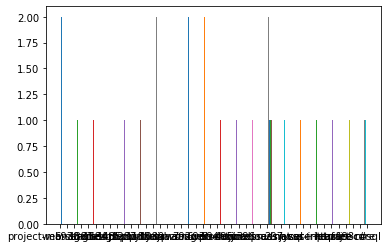

In [147]:
import matplotlib.pyplot as plt 

x = total_tags.most_common(30)
b = plt.hist(x, bins=20)

In [148]:
x

[('project-management', 6930),
 ('web-services', 1881),
 ('agile', 1584),
 ('design', 1485),
 ('php', 1287),
 ('security', 1188),
 ('python', 1089),
 ('sql', 1089),
 ('java', 1089),
 ('product-management', 792),
 ('scrum', 693),
 ('amazon-web-services', 594),
 ('product', 495),
 ('clojure', 495),
 ('jira', 396),
 ('wordpress', 396),
 ('cloud', 396),
 ('saas', 297),
 ('.net', 297),
 ('mysql', 297),
 ('css', 297),
 ('javascript', 297),
 ('c++', 297),
 ('user-interface', 297),
 ('http', 297),
 ('reactjs', 297),
 ('azure', 198),
 ('.net-core', 198),
 ('c#', 198),
 ('nosql', 198)]

In [199]:
db3.describe()

,Unnamed: 0
count,1576.000000
mean,787.500000
std,455.096327
min,0.000000
25%,393.750000
50%,787.500000
75%,1181.250000
max,1575.000000
